#COMPARISONS

In [ ]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/FN.csv')

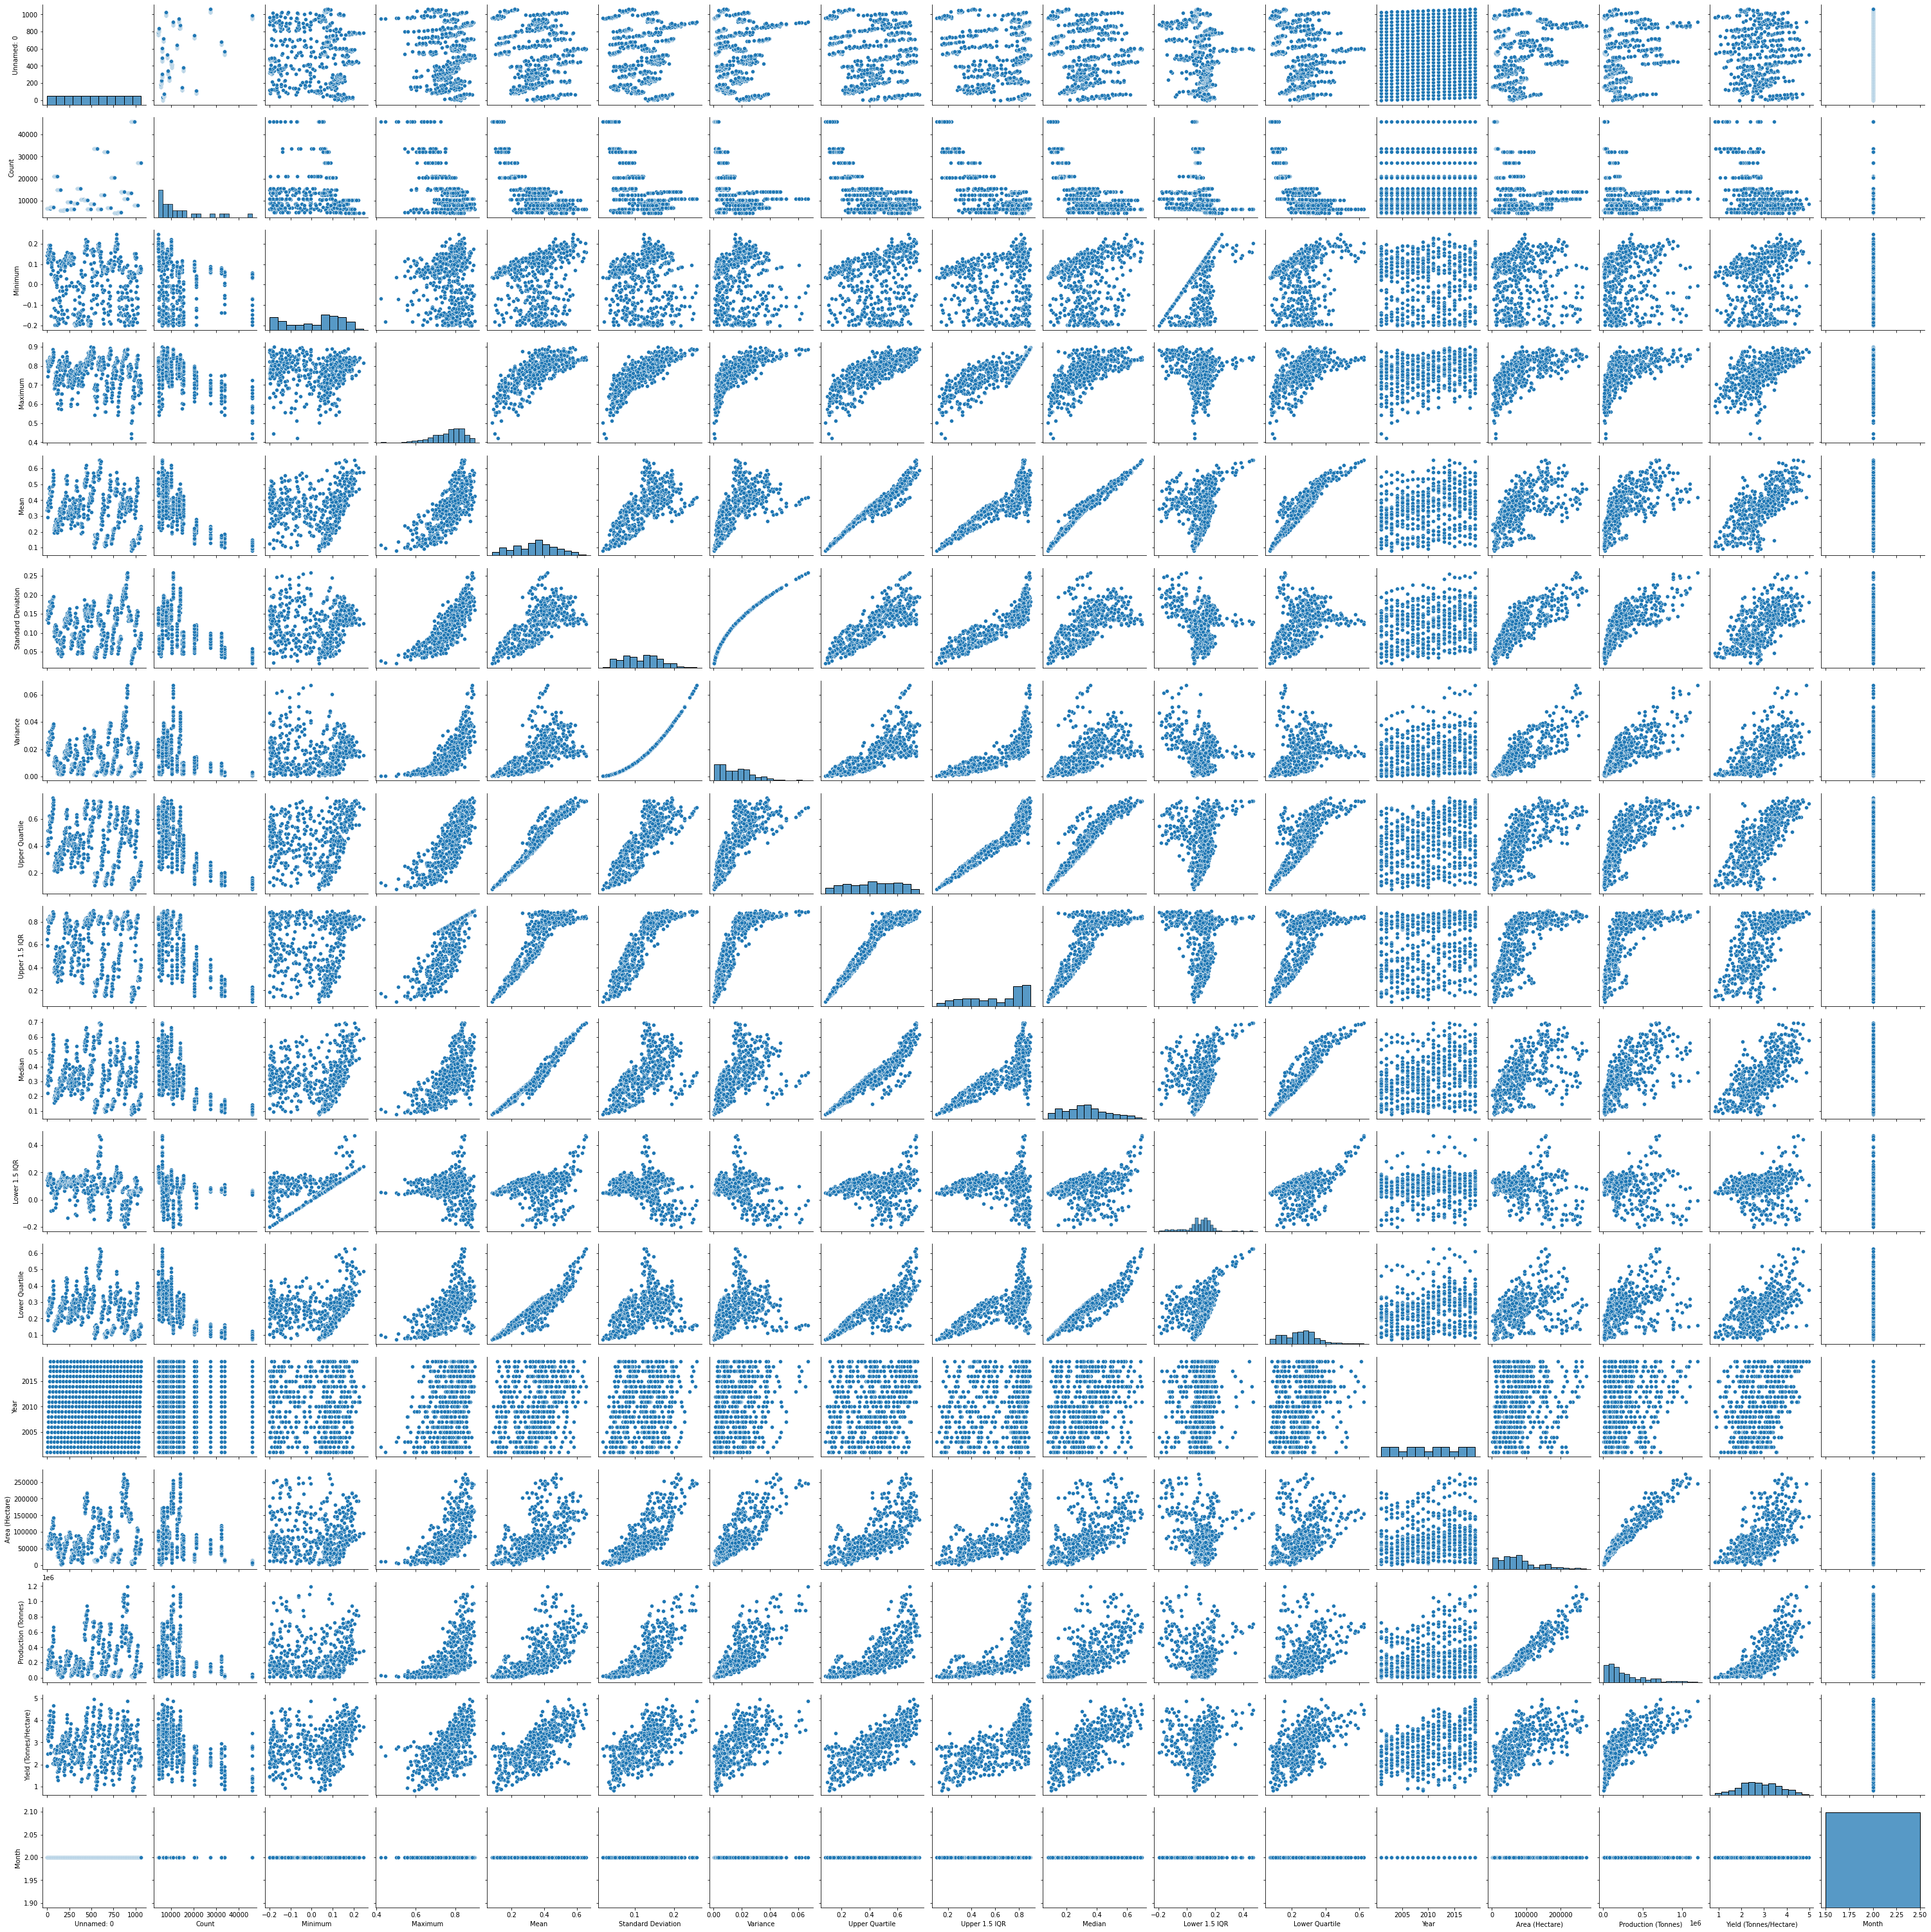

In [ ]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)


In [ ]:
df.corr()

Unnamed: 0     Count  ...  Yield (Tonnes/Hectare)  Month
Unnamed: 0                1.000000  0.333613  ...               -0.047059    NaN
Count                     0.333613  1.000000  ...               -0.458117    NaN
Minimum                  -0.066240 -0.090393  ...                0.216160    NaN
Maximum                  -0.102082 -0.608528  ...                0.577307    NaN
Mean                     -0.131815 -0.730501  ...                0.730676    NaN
Standard Deviation        0.037910 -0.520899  ...                0.655519    NaN
Variance                  0.091843 -0.426701  ...                0.624109    NaN
Upper Quartile           -0.077832 -0.700114  ...                0.764465    NaN
Upper 1.5 IQR            -0.073383 -0.720548  ...                0.704208    NaN
Median                   -0.122469 -0.664958  ...                0.713664    NaN
Lower 1.5 IQR            -0.253103 -0.224164  ...                0.136137    NaN
Lower Quartile           -0.180084 -0.669159  ...                0.589926    NaN
Year                      0.035665  0.000077  ...                0.348953    NaN
Area (Hectare)            0.221451 -0.284335  ...                0.627216    NaN
Production (Tonnes)       0.196594 -0.293781  ...                0.755508    NaN
Yield (Tonnes/Hectare)   -0.047059 -0.458117  ...                1.000000    NaN
Month                          NaN       NaN  ...                     NaN    NaN

[17 rows x 17 columns]

In [ ]:
df.shape

(532, 19)

In [ ]:
dfndvi=df.copy()
dfndvi.drop(['NDVI-Oct','NDVI-Apr','NDVI-May','EVI-Oct','EVI-Nov','EVI-Dec','EVI-Jan','EVI-Feb','EVI-Mar','EVI-Apr','EVI-May','LAI-Oct','LAI-Nov','LAI-Dec','LAI-Jan','LAI-Feb','LAI-Mar','LAI-Apr','LAI-May','Rainfall'], axis=1, inplace=True)
dfndvi=dfndvi.set_index('year')

In [ ]:
df.drop(['Unnamed: 0','Production (Tonnes)'],axis=1, inplace=True)

In [ ]:
dfevi=df.copy()
dfevi.drop(['NDVI-Oct','NDVI-Apr','NDVI-May','NDVI-Nov','NDVI-Dec','NDVI-Jan','NDVI-Feb','NDVI-Mar','EVI-Oct','EVI-Apr','EVI-May','LAI-Oct','LAI-Nov','LAI-Dec','LAI-Jan','LAI-Feb','LAI-Mar','LAI-Apr','LAI-May','Rainfall','Production'], axis=1, inplace=True)
dfevi=dfevi.set_index('year')

In [ ]:
dfndvi.head()

NDVI-Nov  NDVI-Dec  NDVI-Jan  ...  OctoberRF  NovemberRF  DecemberRF
year                                ...                                   
2000  0.205477  0.214600  0.231618  ...   0.655531    3.325500    1.183812
2001  0.220225  0.227810  0.250651  ...  14.283437    0.620031    0.000000
2002  0.178285  0.187111  0.206101  ...   0.400938    6.370687    8.413281
2003  0.242215  0.252126  0.266660  ...   9.327856    8.917806    2.913097
2004  0.233797  0.252087  0.263573  ...  33.956250    0.268750    1.059375

[5 rows x 19 columns]

In [ ]:
dfevi.head()

EVI-Nov   EVI-Dec   EVI-Jan  ...  OctoberRF  NovemberRF  DecemberRF
year                                ...                                   
2000  0.132783  0.138434  0.150869  ...   0.655531    3.325500    1.183812
2001  0.140879  0.145381  0.163560  ...  14.283437    0.620031    0.000000
2002  0.115123  0.120288  0.131459  ...   0.400938    6.370687    8.413281
2003  0.158818  0.163915  0.173033  ...   9.327856    8.917806    2.913097
2004  0.148147  0.161418  0.171633  ...  33.956250    0.268750    1.059375

[5 rows x 19 columns]

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
y=df.pop('Yield (Tonnes/Hectare)')

In [ ]:
pd.get_dummies(df.District)

AJMER  ALWAR  BANSWARA  BARAN  ...  SIKAR  SIROHI  TONK  UDAIPUR
0        0      0         0      0  ...      0       0     0        0
1        0      0         0      0  ...      0       0     0        0
2        0      0         0      0  ...      0       0     0        0
3        0      0         0      0  ...      0       0     0        0
4        0      0         0      0  ...      0       0     0        0
..     ...    ...       ...    ...  ...    ...     ...   ...      ...
527      0      0         0      0  ...      0       0     0        0
528      0      0         0      0  ...      0       0     0        0
529      0      0         0      0  ...      0       0     0        0
530      0      0         0      0  ...      0       0     0        0
531      0      0         0      0  ...      0       0     0        0

[532 rows x 28 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
y_test

(425, 16)
(107, 16)


166    2.090485
365    2.838880
176    2.185145
179    2.107382
180    2.340486
         ...   
60     2.053684
282    1.228594
66     1.980000
204    2.113465
231    2.022859
Name: Yield (Tonnes/Hectare), Length: 107, dtype: float64

In [ ]:
y=dfndvi.pop('Yield')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfndvi, y, test_size=0.1, random_state=2)
print(X_train.shape)
print(X_test.shape)
y_test

(18, 18)
(2, 18)


year
2012    3177.0
2004    2713.0
Name: Yield, dtype: float64

In [ ]:
y=dfevi.pop('Yield')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfevi, y, test_size=0.1, random_state=2)
print(X_train.shape)
print(X_test.shape)
y_test

(18, 18)
(2, 18)


year
2012    3177.0
2004    2713.0
Name: Yield, dtype: float64

##DecisionTree

In [ ]:
dtree = DecisionTreeRegressor(max_depth=6, random_state=5)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

ValueError: ignored

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

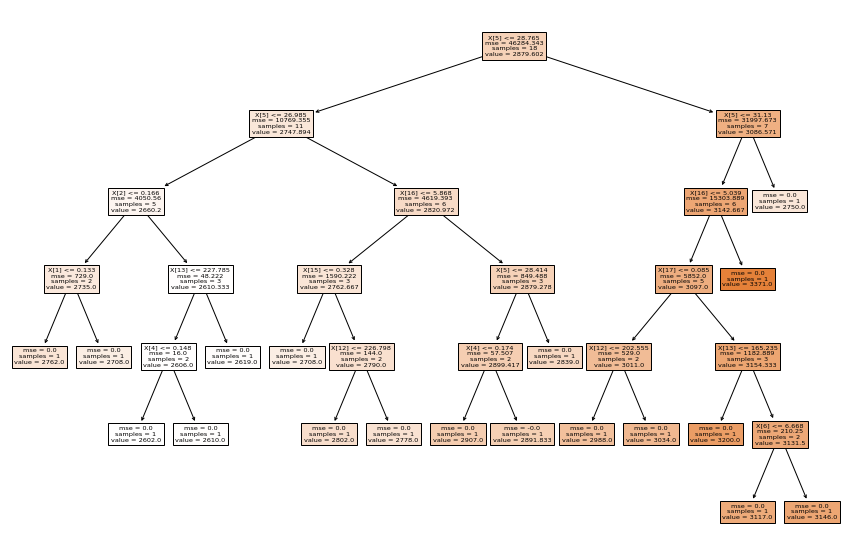

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtree.fit(X_train, y_train), filled=True)
plt.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

RMSE via prediction on training set:  0.0
Mean Absolute Error: [0.]
R squared via prediction on training set:  1.0


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on test set:  78.85429601486528
Mean Absolute Error: [77.]
R squared via prediction on test set:  0.8844753269916765


##RandomForest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=15, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

RMSE via prediction on training set:  65.03072130351927
Mean Absolute Error: [52.71419754]
R squared via prediction on training set:  0.9086301233366394


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

RMSE via prediction on test set:  139.4581578028972
Mean Absolute Error: [134.2]
R squared via prediction on test set:  0.6386634628088255


## Non-Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2
RMSE =  340.8839033560525
MAE  232.0
test_score =  -0.07946116571843898
RMSE =  912.7530741523481
MAE  179.7798353703704
Train =  0.0
For degree  3
RMSE =  340.8839033560525
MAE  232.0
test_score =  -0.07946116571843898
RMSE =  912.7530741523481
MAE  179.7798353703704
Train =  0.0
For degree  4
RMSE =  340.8839033560521
MAE  231.99999999999977
test_score =  -0.07946116571843653
RMSE =  912.7530741523474
MAE  179.77983537037028
Train =  1.5543122344752192e-15


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='linear',C=20,epsilon=15,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

R squared via prediction on training set:  0.7395401251514058


In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr4
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='SVR NDVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

RMSE via prediction on training set:  109.79623941943235
Mean Absolute Error: [52.76376601]
R squared via prediction on training set:  0.7395401251514058


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))

RMSE via prediction on test set:  266.4232073540101
Mean Absolute Error: [254.85625987]
R squared via prediction on test set:  -0.3187671933858105


## Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(90, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='relu'))
ann.add(tf.keras.layers.Dense(10, activation='linear'))
ann.add(tf.keras.layers.Dense(1))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 90)                1710      
_________________________________________________________________
dense_16 (Dense)             (None, 60)                5460      
_________________________________________________________________
dense_17 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 9,321
Trainable params: 9,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.fit(X_train, y_train, epochs=2500)

Streaming output truncated to the last 5000 lines.
Epoch 1/2500
1/1 [==============================] - 0s 425ms/step - loss: 8554833.0000 - mean_squared_error: 8554833.0000
Epoch 2/2500
1/1 [==============================] - 0s 5ms/step - loss: 8486324.0000 - mean_squared_error: 8486324.0000
Epoch 3/2500
1/1 [==============================] - 0s 6ms/step - loss: 8416213.0000 - mean_squared_error: 8416213.0000
Epoch 4/2500
1/1 [==============================] - 0s 6ms/step - loss: 8345918.0000 - mean_squared_error: 8345918.0000
Epoch 5/2500
1/1 [==============================] - 0s 7ms/step - loss: 8277191.0000 - mean_squared_error: 8277191.0000
Epoch 6/2500
1/1 [==============================] - 0s 7ms/step - loss: 8212058.5000 - mean_squared_error: 8212058.5000
Epoch 7/2500
1/1 [==============================] - 0s 7ms/step - loss: 8151986.0000 - mean_squared_error: 8151986.0000
Epoch 8/2500
1/1 [==============================] - 0s 6ms/step - loss: 8091698.0000 - mean_squared_error: 

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

55.659702243351454
468.3899806570463


In [ ]:
pred_train = np.reshape(pred_train, (pred_train.shape[0]))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

RMSE via prediction on training set:  55.659702243351454
Mean Absolute Error: [23.54063135]
R squared via prediction on training set:  0.9330658652230256


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

RMSE via prediction on test set:  468.3899806570463
Mean Absolute Error: [414.55334473]
R squared via prediction on test set:  -3.0760473762616716


# Implementing different models


In [ ]:
gg=pd.read_csv('/content/Report.csv')

In [ ]:
gg

Year       Season  ...  Yield (Tonnes/Hectare)  District
0     2000-01  Rabi         ...                    1.22     Ajmer
1     2001-02  Rabi         ...                    1.82     Ajmer
2     2002-03  Rabi         ...                    2.05     Ajmer
3     2003-04  Rabi         ...                    1.96     Ajmer
4     2004-05  Rabi         ...                    2.06     Ajmer
..        ...          ...  ...                     ...       ...
617   2017-18  Rabi         ...                    2.84   Udaipur
618   2018-19  Rabi         ...                    2.91   Udaipur
619       NaN          NaN  ...                     NaN       NaN
620       NaN          NaN  ...                     NaN       NaN
621       NaN          NaN  ...                     NaN       NaN

[622 rows x 6 columns]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1=pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/Rajasthan_District_Wise_Yield.csv')
df1.head()

Unnamed: 0 State/Crop/District  ... Production (Tonnes) Yield (Tonnes/Hectare)
0           0               AJMER  ...               41829               1.220216
1           1               AJMER  ...               75770               1.823542
2           2               AJMER  ...               23077               2.052383
3           3               AJMER  ...               42225               1.955314
4           4               AJMER  ...               52533               2.063597

[5 rows x 7 columns]

In [ ]:
df2=pd.read_csv('/content/EVI1.csv')
df2.head()

File Name  ... District
0  MOD13A3_006__1_km_monthly_EVI_doy2000032_aid0001  ...  Karauli
1  MOD13A3_006__1_km_monthly_EVI_doy2001001_aid0001  ...  Karauli
2  MOD13A3_006__1_km_monthly_EVI_doy2001032_aid0001  ...  Karauli
3  MOD13A3_006__1_km_monthly_EVI_doy2002001_aid0001  ...  Karauli
4  MOD13A3_006__1_km_monthly_EVI_doy2002032_aid0001  ...  Karauli

[5 rows x 17 columns]

In [ ]:
df2.drop(columns = ['File Name', 'Dataset', 'aid', 'Range'], inplace=True)


In [ ]:
df1.drop(columns = ['Unnamed: 0'] , inplace=True)

KeyError: ignored

In [ ]:
pd.to_datetime(df2['Date'])

0      2000-01-02
1      2001-01-01
2      2001-01-02
3      2002-01-01
4      2002-01-02
          ...    
1371   2019-01-02
1372   2020-01-01
1373   2020-01-02
1374   2021-01-01
1375   2021-01-02
Name: Date, Length: 1376, dtype: datetime64[ns]

In [ ]:
df2['Year'] = pd.DatetimeIndex(df2['Date']).year

In [ ]:
df2.head()

Date  Count  Minimum  ...  Lower Quartile  District  Year
0  01/02/2000   6349   0.0429  ...          0.1461   Karauli  2000
1  01/01/2001   6352   0.0863  ...          0.1576   Karauli  2001
2  01/02/2001   6352   0.0664  ...          0.1449   Karauli  2001
3  01/01/2002   6352   0.0897  ...          0.1495   Karauli  2002
4  01/02/2002   6352   0.0660  ...          0.1453   Karauli  2002

[5 rows x 14 columns]

In [ ]:
df2['District'] = df2['District'].str.upper()

In [ ]:
df2.head()

Date  Count  Minimum  ...  Lower Quartile  District  Year
0  01/02/2000   6349   0.0429  ...          0.1461   KARAULI  2000
1  01/01/2001   6352   0.0863  ...          0.1576   KARAULI  2001
2  01/02/2001   6352   0.0664  ...          0.1449   KARAULI  2001
3  01/01/2002   6352   0.0897  ...          0.1495   KARAULI  2002
4  01/02/2002   6352   0.0660  ...          0.1453   KARAULI  2002

[5 rows x 14 columns]

In [ ]:
pd.to_numeric(df2['Year'])

0       2000
1       2001
2       2001
3       2002
4       2002
        ... 
1371    2019
1372    2020
1373    2020
1374    2021
1375    2021
Name: Year, Length: 1376, dtype: int64

In [ ]:
df1

State/Crop/District      Year  ... Production (Tonnes)  Yield (Tonnes/Hectare)
0                 AJMER   2000-01  ...               41829                1.220216
1                 AJMER   2001-02  ...               75770                1.823542
2                 AJMER   2002-03  ...               23077                2.052383
3                 AJMER   2003-04  ...               42225                1.955314
4                 AJMER   2004-05  ...               52533                2.063597
..                  ...       ...  ...                 ...                     ...
615             UDAIPUR   2015-16  ...              210840                2.817888
616             UDAIPUR   2016-17  ...              250975                3.121191
617             UDAIPUR   2017-18  ...              229859                2.839974
618             UDAIPUR   2018-19  ...              217764                2.911556
619       Total - Wheat       NaN  ...           162270244                3.210376

[620 rows x 6 columns]

In [ ]:
df1["Year"]= df1["Year"].str.replace('2000-01', '2001')
df1["Year"]= df1["Year"].str.replace('2001-02', '2002')
df1["Year"]= df1["Year"].str.replace('2002-03', '2003')
df1["Year"]= df1["Year"].str.replace('2003-04', '2004')
df1["Year"]= df1["Year"].str.replace('2004-05', '2005')
df1["Year"]= df1["Year"].str.replace('2005-06', '2006')
df1["Year"]= df1["Year"].str.replace('2006-07', '2007')
df1["Year"]= df1["Year"].str.replace('2007-08', '2008')
df1["Year"]= df1["Year"].str.replace('2008-09', '2009')
df1["Year"]= df1["Year"].str.replace('2009-10', '2010')
df1["Year"]= df1["Year"].str.replace('2010-11', '2011')
df1["Year"]= df1["Year"].str.replace('2011-12', '2012')
df1["Year"]= df1["Year"].str.replace('2012-13', '2013')
df1["Year"]= df1["Year"].str.replace('2013-14', '2014')
df1["Year"]= df1["Year"].str.replace('2014-15', '2015')
df1["Year"]= df1["Year"].str.replace('2015-16', '2016')
df1["Year"]= df1["Year"].str.replace('2016-17', '2017')
df1["Year"]= df1["Year"].str.replace('2017-18', '2018')
df1["Year"]= df1["Year"].str.replace('2018-19', '2019')
df1["Year"]= df1["Year"].replace(np.nan, 0)

In [ ]:
df1['Year'].dropna

<bound method Series.dropna of 0       2001
1       2002
2       2003
3       2004
4       2005
       ...  
615     2016
616     2017
617     2018
618     2019
619        0
Name: Year, Length: 620, dtype: object>

In [ ]:
pd.to_numeric(df1['Year'])

0      2001
1      2002
2      2003
3      2004
4      2005
       ... 
615    2016
616    2017
617    2018
618    2019
619       0
Name: Year, Length: 620, dtype: int64

In [ ]:
df1.head()

State/Crop/District   Year  ... Production (Tonnes)  Yield (Tonnes/Hectare)
0               AJMER   2001  ...               41829                1.220216
1               AJMER   2002  ...               75770                1.823542
2               AJMER   2003  ...               23077                2.052383
3               AJMER   2004  ...               42225                1.955314
4               AJMER   2005  ...               52533                2.063597

[5 rows x 6 columns]

In [ ]:
df2.head()

Date  Count  Minimum  ...  Lower Quartile  District  Year
0  01/02/2000   6349   0.0429  ...          0.1461   KARAULI  2000
1  01/01/2001   6352   0.0863  ...          0.1576   KARAULI  2001
2  01/02/2001   6352   0.0664  ...          0.1449   KARAULI  2001
3  01/01/2002   6352   0.0897  ...          0.1495   KARAULI  2002
4  01/02/2002   6352   0.0660  ...          0.1453   KARAULI  2002

[5 rows x 14 columns]

In [ ]:
df1['Year']=df1['Year'].astype(int)
df1['State/Crop/District']=df1['State/Crop/District'].astype(str)
df2['District']=df2['District'].astype(str)

In [ ]:
pd.to_string(df1['State/Crop/District'])

AttributeError: ignored

In [ ]:
df1.dtypes

State/Crop/District        object
Year                        int64
Season                     object
Area (Hectare)              int64
Production (Tonnes)         int64
Yield (Tonnes/Hectare)    float64
dtype: object

In [ ]:
df2.dtypes

Date                   object
Count                   int64
Minimum               float64
Maximum               float64
Mean                  float64
Standard Deviation    float64
Variance              float64
Upper Quartile        float64
Upper 1.5 IQR         float64
Median                float64
Lower 1.5 IQR         float64
Lower Quartile        float64
District               object
Year                    int64
dtype: object

In [ ]:
res=df2.merge(df1,how='inner',left_on=['Year','District'],right_on=['Year','State/Crop/District'])

In [ ]:
res.head()

Date  Count  ...  Production (Tonnes)  Yield (Tonnes/Hectare)
0  01/01/2001   6352  ...               118884                1.921016
1  01/02/2001   6352  ...               118884                1.921016
2  01/01/2002   6352  ...               174640                3.156677
3  01/02/2002   6352  ...               174640                3.156677
4  01/01/2003   6352  ...               131287                2.479874

[5 rows x 19 columns]

In [ ]:
res.shape

(1064, 19)

In [ ]:
from google.colab import files 
res.to_csv('test.csv')
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
res['Month'] = pd.DatetimeIndex(res['Date']).month

In [ ]:
res.head()

Date  Count  ...  Yield (Tonnes/Hectare)  Month
0  01/01/2001   6352  ...                1.921016      1
1  01/02/2001   6352  ...                1.921016      1
2  01/01/2002   6352  ...                3.156677      1
3  01/02/2002   6352  ...                3.156677      1
4  01/01/2003   6352  ...                2.479874      1

[5 rows x 20 columns]

In [ ]:
res['Date']=res['Date'].astype(str)

In [ ]:
str=res['Date'].iloc[1]
substr=str[3:5]
substr

'02'

In [ ]:
for i in res.index:
  str1=res['Date'].iloc[i]
  substr=str1[3:5]
  res['Month'].iloc[i]=substr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
res.head()
res.columns

Index(['Date', 'Count', 'Minimum', 'Maximum', 'Mean', 'Standard Deviation',
       'Variance', 'Upper Quartile', 'Upper 1.5 IQR', 'Median',
       'Lower 1.5 IQR', 'Lower Quartile', 'District', 'Year',
       'State/Crop/District', 'Season', 'Area (Hectare)',
       'Production (Tonnes)', 'Yield (Tonnes/Hectare)', 'Month'],
      dtype='object')

In [ ]:
res=res.drop(columns=['State/Crop/District','Date'])

In [ ]:
res

Count  Minimum  ...  Yield (Tonnes/Hectare)  Month
0      6352   0.0863  ...                1.921016     01
1      6352   0.0664  ...                1.921016     02
2      6352   0.0897  ...                3.156677     01
3      6352   0.0660  ...                3.156677     02
4      6352   0.0555  ...                2.479874     01
...     ...      ...  ...                     ...    ...
1059  27279   0.0493  ...                2.318185     02
1060  27279   0.0436  ...                2.284951     01
1061  27279   0.0465  ...                2.284951     02
1062  27279   0.0354  ...                2.351472     01
1063  27279   0.0507  ...                2.351472     02

[1064 rows x 18 columns]

In [ ]:
from google.colab import files 
res.to_csv('gg1.csv')
files.download('gg1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
res.sort_values(by=['Month'])

Count  Minimum  ...  Yield (Tonnes/Hectare)  Month
0      6352   0.0863  ...                1.921016     01
844   14047  -0.0195  ...                3.178609     01
436   10187   0.0917  ...                3.749346     01
438   10187   0.0917  ...                4.206663     01
842   14047  -0.0233  ...                2.777035     01
...     ...      ...  ...                     ...    ...
475    6152  -0.0547  ...                2.010315     02
477    6152  -0.0528  ...                2.049017     02
479    6149  -0.0392  ...                2.337211     02
527    8381  -0.0278  ...                4.532778     02
1063  27279   0.0507  ...                2.351472     02

[1064 rows x 18 columns]

In [ ]:
evijan=res.loc[res['Month']=='01']
evifeb=res.loc[res['Month']=='02']

In [ ]:
print(evijan.shape)
print(evifeb.shape)


(532, 18)
(532, 18)


In [ ]:
from google.colab import files 
evijan.to_csv('JE.csv')
files.download('JE.csv')
evifeb.to_csv('FE.csv')
files.download('FE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Editing and Joining DataFrame work

In [ ]:
NDVI_EVI_Rainfall = pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/WithRF.csv')

In [ ]:
NDVI_EVI_Rainfall = pd.read_csv('/content/NERT.csv')

In [ ]:
NDVI_EVI_Rainfall.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'District', 'Year', 'January', 'February',
       'March', 'October', 'November', 'December', 'Annual Total',
       'Unnamed: 0.1', 'FNCount', 'FNMinimum', 'FNMaximum', 'FNMean',
       'FNStandard Deviation', 'FNVariance', 'FNUpper Quartile',
       'FNUpper 1.5 IQR', 'FNMedian', 'FNLower 1.5 IQR', 'FNLower Quartile',
       'Season', 'Area (Hectare)', 'Production (Tonnes)',
       'Yield (Tonnes/Hectare)', 'JNCount', 'JNMinimum', 'JNMaximum', 'JNMean',
       'JNStandard Deviation', 'JNVariance', 'JNUpper Quartile',
       'JNUpper 1.5 IQR', 'JNMedian', 'JNLower 1.5 IQR', 'JNLower Quartile',
       'FECount', 'FEMinimum', 'FEMaximum', 'FEMean', 'FEStandard Deviation',
       'FEVariance', 'FEUpper Quartile', 'FEUpper 1.5 IQR', 'FEMedian',
       'FELower 1.5 IQR', 'FELower Quartile', 'JECount', 'JEMinimum',
       'JEMaximum', 'JEMean', 'JEStandard Deviation', 'JEVariance',
       'JEUpper Quartile', 'JEUpper 1.5 IQR', 'JEMedian', 'JELower 1.5 IQ

In [ ]:
NDVI_EVI_Rainfall.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0_x','Season','Annual Total','FNCount','FNStandard Deviation', 'FNVariance', 'FNUpper Quartile',
       'FNUpper 1.5 IQR', 'FNMedian', 'FNLower 1.5 IQR', 'FNLower Quartile','JNCount','JNStandard Deviation', 'JNVariance', 'JNUpper Quartile',
       'JNUpper 1.5 IQR', 'JNMedian', 'JNLower 1.5 IQR', 'JNLower Quartile',
       'FECount','FEVariance', 'FEUpper Quartile', 'FEUpper 1.5 IQR', 'FEMedian',
       'FELower 1.5 IQR', 'FELower Quartile', 'JECount','JEStandard Deviation', 'JEVariance',
       'JEUpper Quartile', 'JEUpper 1.5 IQR', 'JEMedian', 'JELower 1.5 IQR',
       'JELower Quartile', 'Unnamed: 0_y'], inplace=True)

In [ ]:
NDVI_EVI_Rainfall.drop(columns=['Area (Hectare)', 'Production (Tonnes)'],inplace=True)

In [ ]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(NDVI_EVI_Rainfall)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd5bcfe4dd0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fd5bcfed440> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
NDVI_EVI_Rainfall = pd.get_dummies(data=NDVI_EVI_Rainfall, columns=['District'])

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
NDVI = pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/Master.csv')
NDVI.head()

Unnamed: 0 District  FNCount  ...  JEMedian  JELower 1.5 IQR  JELower Quartile
0           1  KARAULI     6352  ...   0.18965           0.0863            0.1576
1           3  KARAULI     6352  ...   0.18250           0.0897            0.1495
2           5  KARAULI     6352  ...   0.14430           0.0555            0.1257
3           7  KARAULI     6352  ...   0.20825           0.0688            0.1428
4           9  KARAULI     6352  ...   0.22010           0.0512            0.1540

[5 rows x 51 columns]

In [ ]:
NDVI_Jan.columns

Index(['Unnamed: 0', 'District', 'FNCount', 'FNMinimum', 'FNMaximum', 'FNMean',
       'FNStandard Deviation', 'FNVariance', 'FNUpper Quartile',
       'FNUpper 1.5 IQR', 'FNMedian', 'FNLower 1.5 IQR', 'FNLower Quartile',
       'Year', 'Season', 'Area (Hectare)', 'Production (Tonnes)',
       'Yield (Tonnes/Hectare)', 'JNCount', 'JNMinimum', 'JNMaximum', 'JNMean',
       'JNStandard Deviation', 'JNVariance', 'JNUpper Quartile',
       'JNUpper 1.5 IQR', 'JNMedian', 'JNLower 1.5 IQR', 'JNLower Quartile',
       'FECount', 'FEMinimum', 'FEMaximum', 'FEMean', 'FEStandard Deviation',
       'FEVariance', 'FEUpper Quartile', 'FEUpper 1.5 IQR', 'FEMedian',
       'FELower 1.5 IQR', 'FELower Quartile', 'JECount', 'JEMinimum',
       'JEMaximum', 'JEMean', 'JEStandard Deviation', 'JEVariance',
       'JEUpper Quartile', 'JEUpper 1.5 IQR', 'JEMedian', 'JELower 1.5 IQR',
       'JELower Quartile'],
      dtype='object')

In [ ]:
NDVI_Jan.drop(columns = ['Unnamed: 0', 'Production (Tonnes)', 'Year', 'Season'], inplace=True)

In [ ]:
NDVI_Feb = pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/FN.csv')
NDVI_Feb.head()

Unnamed: 0 District  ...  Yield (Tonnes/Hectare)  Month
0           1  KARAULI  ...                1.921016      2
1           3  KARAULI  ...                3.156677      2
2           5  KARAULI  ...                2.479874      2
3           7  KARAULI  ...                3.638726      2
4           9  KARAULI  ...                3.277460      2

[5 rows x 19 columns]

In [ ]:
NDVI_Feb.drop(columns = ['Unnamed: 0', 'Production (Tonnes)', 'Month', 'Year', 'Season'], inplace=True)
NDVI_Feb = pd.get_dummies(data=NDVI_Feb, columns=['District'])

In [ ]:
NDVI_Feb.columns

Index(['Count', 'Minimum', 'Maximum', 'Mean', 'Standard Deviation', 'Variance',
       'Upper Quartile', 'Upper 1.5 IQR', 'Median', 'Lower 1.5 IQR',
       'Lower Quartile', 'Area (Hectare)', 'Yield (Tonnes/Hectare)',
       'District_AJMER', 'District_ALWAR', 'District_BANSWARA',
       'District_BARAN', 'District_BARMER', 'District_BHARATPUR',
       'District_BHILWARA', 'District_BIKANER', 'District_BUNDI',
       'District_CHURU', 'District_DAUSA', 'District_DUNGARPUR',
       'District_GANGANAGAR', 'District_HANUMANGARH', 'District_JAIPUR',
       'District_JAISALMER', 'District_JHALAWAR', 'District_JODHPUR',
       'District_KARAULI', 'District_KOTA', 'District_NAGAUR', 'District_PALI',
       'District_RAJSAMAND', 'District_SAWAI MADHOPUR', 'District_SIKAR',
       'District_SIROHI', 'District_TONK', 'District_UDAIPUR'],
      dtype='object')

In [ ]:
NDVI_Jan = pd.get_dummies(data=NDVI_Jan, columns=['District'])

In [ ]:
NDVI_Jan.head()

FNCount  FNMinimum  ...  District_TONK  District_UDAIPUR
0     6352     0.1428  ...              0                 0
1     6352     0.1581  ...              0                 0
2     6352     0.1210  ...              0                 0
3     6352     0.1579  ...              0                 0
4     6352     0.1072  ...              0                 0

[5 rows x 74 columns]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(NDVI_Jan.drop(columns='Yield (Tonnes/Hectare)'), NDVI_Jan['Yield (Tonnes/Hectare)'], test_size = 0.25, random_state=7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(NDVI_EVI_Rainfall.drop(columns='Yield (Tonnes/Hectare)'), NDVI_EVI_Rainfall['Yield (Tonnes/Hectare)'], test_size = 0.25, random_state=8)

In [ ]:
print('Size of X_train =', X_train.shape)
print('Size of X_test =', X_test.shape)

Size of X_train = (324, 54)
Size of X_test = (108, 54)


In [ ]:
y_test

306    2.030385
273    3.905844
417    3.303776
350    2.828608
260    1.968057
         ...   
146    1.619606
17     3.174246
84     2.692945
423    2.394245
92     3.318350
Name: Yield (Tonnes/Hectare), Length: 108, dtype: float64

## Decision Tree Model using only NDVI

## Decision Tree Model only using everything

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
for i in range(2, 7):
  print('i =', i)
  for j in range(0, 10):
    print('j =', j)
    dtree = DecisionTreeRegressor(max_depth=i, random_state=j)
    dtree.fit(X_train, y_train)
    y1 = dtree.predict(X_test)
    # Print RMSE and R-squared value for regression tree 'dtree1' on testing data
    # print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
    # print('Mean Absolute Error:', mean_absolute_error(y_test,y1,multioutput='raw_values'))
    print('R squared via prediction on test set: ', r2_score(y_test, y1))

i = 2
j = 0
R squared via prediction on test set:  0.47825647611420585
j = 1
R squared via prediction on test set:  0.47825647611420585
j = 2
R squared via prediction on test set:  0.47825647611420563
j = 3
R squared via prediction on test set:  0.47825647611420574
j = 4
R squared via prediction on test set:  0.47825647611420574
j = 5
R squared via prediction on test set:  0.47825647611420563
j = 6
R squared via prediction on test set:  0.47825647611420563
j = 7
R squared via prediction on test set:  0.47825647611420574
j = 8
R squared via prediction on test set:  0.47825647611420563
j = 9
R squared via prediction on test set:  0.47825647611420563
i = 3
j = 0
R squared via prediction on test set:  0.45466842453758627
j = 1
R squared via prediction on test set:  0.4710092962736081
j = 2
R squared via prediction on test set:  0.4871344003998114
j = 3
R squared via prediction on test set:  0.4710092962736081
j = 4
R squared via prediction on test set:  0.4871344003998115
j = 5
R squared v

In [ ]:
dtree = DecisionTreeRegressor(max_depth=4, random_state=1)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:', mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on test set:  0.528596030892682
Mean Absolute Error: [0.42372844]
R squared via prediction on test set:  0.5600831624777858


In [ ]:
real_y = y_train.append(y_test)

# Visualization of the Prediction
pred_y = np.append(tr1, y1)
another_df = pd.DataFrame(real_y, index=real_y.index)
another_df['Year'] = NDVI_EVI_Rainfall['Year']
another_df['Pred Y'] = pred_y
another_df.sort_values(by='Year', inplace=True)
another_df.reset_index(inplace=True)

fig = px.box(another_df, x=another_df['Year'], y='Pred Y')
fig.add_trace(go.Box(x=another_df['Year'], y=another_df['Yield (Tonnes/Hectare)'], name='Yield'))

fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(title='Decision Tree Model')
fig.show()

In [ ]:
temp_df = y_test.to_frame()
temp_df['pred_yield'] = y1

In [ ]:
temp_df.shape

(109, 2)

In [ ]:
temp_df.head()

Yield (Tonnes/Hectare)  pred_yield
166                3.599610    3.429765
308                2.030385    2.118366
72                 3.811536    3.882183
55                 2.356835    2.574883
366                2.923929    3.247977

In [ ]:
fig=px.scatter(temp_df,x='pred_yield',y='Yield (Tonnes/Hectare)',height=600,width=600)
fig.update_xaxes(showgrid=False)
fig.show()

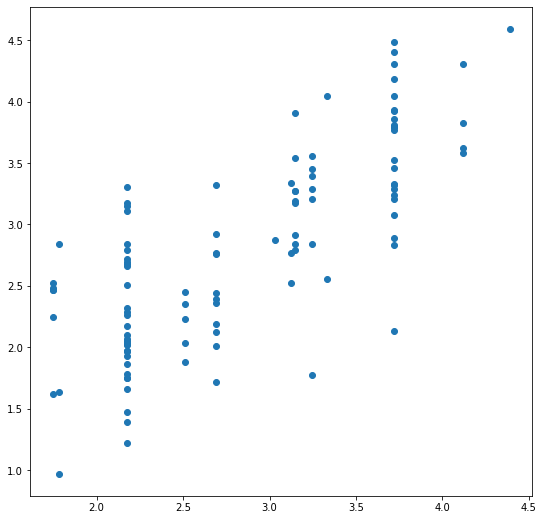

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xpoints = np.array(temp_df['pred_yield'])
ypoints = np.array(temp_df['Yield (Tonnes/Hectare)'])

plt.scatter(xpoints, ypoints)
plt.show()

In [ ]:
temp_df.sort_values(by='Yield (Tonnes/Hectare)', inplace=True)
temp_df.reset_index(inplace=True)

In [ ]:
temp_df.columns

Index(['index', 'Yield (Tonnes/Hectare)', 'pred_yield'], dtype='object')

In [ ]:
fig = px.scatter(temp_df, x=temp_df.index, y=temp_df['pred_yield'], trendline='lowess')
fig.add_trace(go.Line(x = temp_df.index, y = temp_df['Yield (Tonnes/Hectare)'], name = 'Actual Yield'))
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




February

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(NDVI_Feb.drop(columns='Yield (Tonnes/Hectare)'), NDVI_Feb['Yield (Tonnes/Hectare)'], test_size = 0.25, random_state=7)

In [ ]:
for i in range(2, 10):
  print('i =', i)
  for j in range(0, 10):
    print('j =', j)
    dtree = DecisionTreeRegressor(max_depth=i, random_state=j)
    dtree.fit(X_train, y_train)
    y1 = dtree.predict(X_test)
    # Print RMSE and R-squared value for regression tree 'dtree1' on testing data
    # print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
    # print('Mean Absolute Error:', mean_absolute_error(y_test,y1,multioutput='raw_values'))
    print('R squared via prediction on test set: ', r2_score(y_test, y1))

i = 2
j = 0
R squared via prediction on test set:  0.6458659117540686
j = 1
R squared via prediction on test set:  0.6458659117540686
j = 2
R squared via prediction on test set:  0.6458659117540685
j = 3
R squared via prediction on test set:  0.6458659117540685
j = 4
R squared via prediction on test set:  0.6458659117540686
j = 5
R squared via prediction on test set:  0.6458659117540686
j = 6
R squared via prediction on test set:  0.6458659117540686
j = 7
R squared via prediction on test set:  0.6458659117540689
j = 8
R squared via prediction on test set:  0.6458659117540686
j = 9
R squared via prediction on test set:  0.6458659117540686
i = 3
j = 0
R squared via prediction on test set:  0.6096841361028469
j = 1
R squared via prediction on test set:  0.6096841361028469
j = 2
R squared via prediction on test set:  0.6096841361028469
j = 3
R squared via prediction on test set:  0.609684136102847
j = 4
R squared via prediction on test set:  0.6096841361028467
j = 5
R squared via predictio

In [ ]:
dtree = DecisionTreeRegressor(max_depth=4, random_state=1)
dtree.fit(X_train, y_train)
y2 = dtree.predict(X_test)
tr2 = dtree.predict(X_train)
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2)))
print('R squared via prediction on test set: ', r2_score(y_train, tr2))

RMSE via prediction on test set:  0.5393305165420436
R squared via prediction on test set:  0.7362238874999594


In [ ]:
y_test.mean()

2.856280780938058

In [ ]:
comb_df = y_test.to_frame()
comb_df['Pred_Jan'] = y1
comb_df['Pred_Feb'] = y2

In [ ]:
comb_df.head()

Yield (Tonnes/Hectare)  Pred_Jan  Pred_Feb
55                 2.655383  2.412227  2.266434
530                2.284951  2.685408  2.266434
278                1.358678  1.491237  1.453912
89                 2.931345  3.240178  2.838901
82                 3.187554  3.240178  2.838901

In [ ]:
temp_df = comb_df.copy()
temp_df.sort_values(by='Yield (Tonnes/Hectare)', inplace=True)
temp_df.reset_index(inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp_df.index, y = temp_df['Pred_Jan'], name='Predicted Yield Jan', mode='markers'))
fig.add_trace(go.Scatter(x=temp_df.index, y = temp_df['Pred_Feb'], name='Predicted Yield Feb', mode='markers'))
fig.add_trace(go.Line(x = temp_df.index, y = temp_df['Yield (Tonnes/Hectare)'], name = 'Actual Yield'))
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [ ]:
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

In [ ]:
# curve fit
popt, _ = curve_fit(objective, temp_df['Pred_Jan'].to_numpy(), temp_df['Yield (Tonnes/Hectare)'].to_numpy())

y = -0.05493 * x + 0.15075 * x^2 + 1.72178


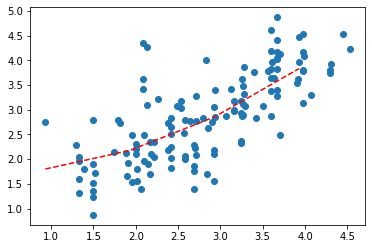

In [ ]:
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(temp_df['Pred_Jan'], temp_df['Yield (Tonnes/Hectare)'])
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(temp_df['Pred_Jan']), max(temp_df['Pred_Jan']), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [ ]:
x_line

array([0.93157279, 1.93157279, 2.93157279, 3.93157279])

In [ ]:
y_line

array([1.80143547, 2.17812921, 2.85632875, 3.83603409])

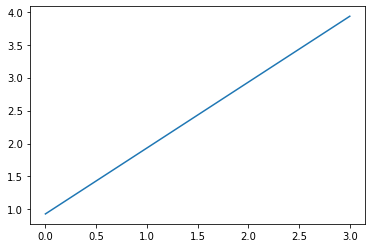

In [ ]:
pyplot.plot(x_line)

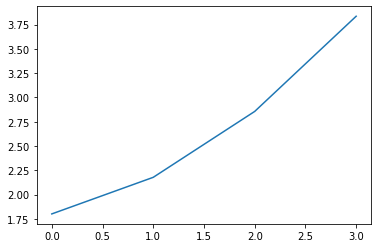

In [ ]:
pyplot.plot(y_line)

In [ ]:
NDVI_Jan.describe()

Count     Minimum  ...  District_TONK  District_UDAIPUR
count    532.000000  532.000000  ...     532.000000        532.000000
mean   13454.203008   -0.005660  ...       0.035714          0.035714
std    10027.258584    0.127842  ...       0.185752          0.185752
min     4495.000000   -0.200000  ...       0.000000          0.000000
25%     6340.250000   -0.128025  ...       0.000000          0.000000
50%     9784.500000    0.003200  ...       0.000000          0.000000
75%    15072.000000    0.101075  ...       0.000000          0.000000
max    45853.000000    0.252700  ...       1.000000          1.000000

[8 rows x 41 columns]

In [ ]:
NDVI_Feb.describe()

Count     Minimum  ...  District_TONK  District_UDAIPUR
count    532.000000  532.000000  ...     532.000000        532.000000
mean   13454.203008   -0.005660  ...       0.035714          0.035714
std    10027.258584    0.127842  ...       0.185752          0.185752
min     4495.000000   -0.200000  ...       0.000000          0.000000
25%     6340.250000   -0.128025  ...       0.000000          0.000000
50%     9784.500000    0.003200  ...       0.000000          0.000000
75%    15072.000000    0.101075  ...       0.000000          0.000000
max    45853.000000    0.252700  ...       1.000000          1.000000

[8 rows x 41 columns]

## Non-Linear only using NDVI

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(NDVI_Jan.drop(columns='Yield (Tonnes/Hectare)'), NDVI_Jan['Yield (Tonnes/Hectare)'], test_size = 0.25, random_state=7)

In [ ]:
real_y = y_train.append(y_test)

# Alpha (regularization strength) of LASSO regression
lasso_eps=0.001
lasso_nalpha=50
lasso_iter=50000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 3
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train, y_train)
    train_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    
    # Visualization of the Prediction
    pred_y = np.append(train_pred, test_pred)
    another_df = pd.DataFrame(real_y, index=real_y.index)
    another_df['Pred Y'] = pred_y
    another_df.sort_values(by='Yield (Tonnes/Hectare)', inplace=True)
    another_df.reset_index(inplace=True)

    fig = px.scatter(another_df, x=another_df.index, y='Pred Y', trendline='lowess')
    fig.add_trace(go.Line(x=another_df.index, y=another_df['Yield (Tonnes/Hectare)'], name='Yield'))
    # fig.add_trace(go.Line(x=another_df.index, y=another_df['Pred_Jan'], name='Predicted Yield'))
    fig.update_xaxes(title_text='Index')
    fig.update_yaxes(title_text='Yield')
    fig.update_layout(title='Non Linear Model')
    fig.show()

    RMSE=np.sqrt(np.sum(np.square(np.array(another_df['Yield (Tonnes/Hectare)'])-np.array(another_df['Pred Y']))))
    print('RMSE = ', RMSE)
    print(r2_score(np.array(another_df['Yield (Tonnes/Hectare)']), np.array(another_df['Pred Y'])))

NameError: ignored

##SVR


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='poly',C=10000,epsilon=0.01,degree=30)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))
print('R squared via prediction on Testing set: ', r2_score(y_test, y4))

R squared via prediction on training set:  0.7841243505492947
R squared via prediction on Testing set:  0.6589030851758204


In [ ]:
regr=SVR(kernel='rbf',C=20,epsilon=0.05,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))
print('R squared via prediction on Testing set: ', r2_score(y_test, y4))

R squared via prediction on training set:  0.9522369185174089
R squared via prediction on Testing set:  0.9522083572552534


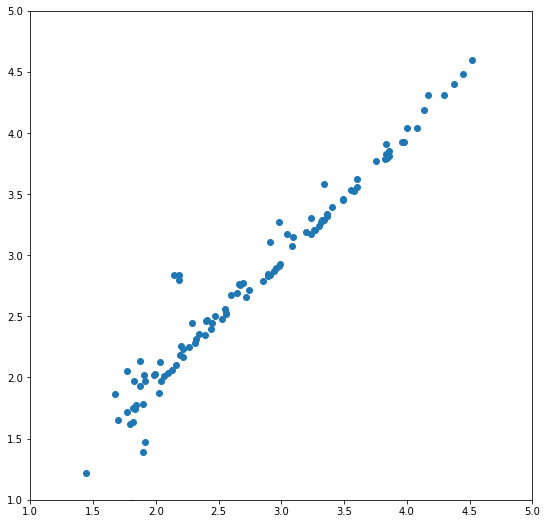

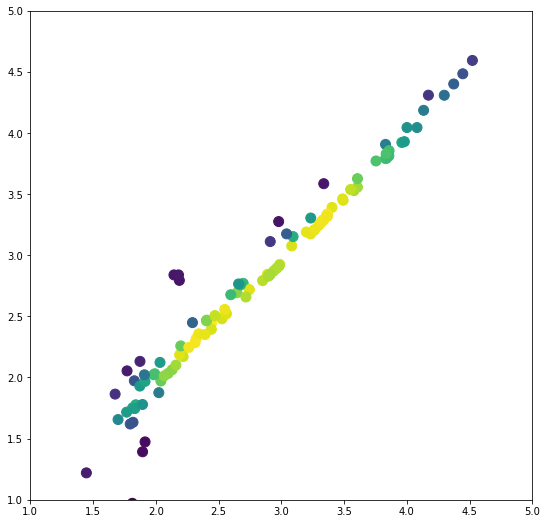

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
x = np.array(another_df['Pred Y'])
y = np.array(another_df['Yield (Tonnes/Hectare)'])
plt.xlim([1, 5])
plt.ylim([1, 5])
plt.scatter(x, y)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,9)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.xlim([1, 5])
plt.ylim([1, 5])
plt.show()

In [ ]:
another_df = y_test.to_frame()
another_df['Year'] = X_test['Year']
another_df['Pred Y'] = y4
another_df.sort_values(by='Year', inplace=True)
another_df.reset_index(inplace=True)

fig = px.box(another_df, x=another_df['Year'], y='Pred Y')
fig.add_trace(go.Box(x=another_df['Year'], y=another_df['Yield (Tonnes/Hectare)'], name='Yield'))

fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(title='svr')
fig.show()

##RF


In [ ]:
model_rf = RandomForestRegressor(n_estimators=20, max_depth=12, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
print('R squared via prediction on training set: ', r2_score(y_train, tr2))
print('R squared via prediction on Testing set: ', r2_score(y_test, y2))

R squared via prediction on training set:  0.9452749335265823
R squared via prediction on Testing set:  0.6795645389664351


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

RMSE via prediction on training set:  0.14834665805481184
Mean Absolute Error: [0.11283379]
R squared via prediction on training set:  0.9660420266811224


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

RMSE via prediction on test set:  0.39072886287262415
Mean Absolute Error: [0.2861996]
R squared via prediction on test set:  0.759633590641993


In [ ]:
real_y = y_train.append(y_test)

train_pred = np.array(model_rf.predict(X_train))
test_pred = np.array(model_rf.predict(X_test))

# Visualization of the Prediction
pred_y = np.append(train_pred, test_pred)
another_df = pd.DataFrame(real_y, index=real_y.index)
another_df['Year'] = NDVI_EVI_Rainfall['Year']
another_df['Pred Y'] = pred_y
another_df.sort_values(by='Year', inplace=True)
another_df.reset_index(inplace=True)

fig = px.box(another_df, x=another_df['Year'], y='Pred Y')
fig.add_trace(go.Box(x=another_df['Year'], y=another_df['Yield (Tonnes/Hectare)'], name='Yield'))

fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(title='Random Forest Model')
fig.show()

In [ ]:
another_df

index  Yield (Tonnes/Hectare)  Year    Pred Y
0      283                2.509713  2001  2.721017
1      321                2.156792  2001  2.084261
2      302                2.005462  2001  2.125749
3      151                2.843613  2001  3.138338
4      189                2.458908  2001  2.581302
..     ...                     ...   ...       ...
427     18                3.472044  2019  3.221334
428    263                2.351472  2019  2.552006
429    355                4.277896  2019  4.213808
430    431                2.911556  2019  2.873014
431     56                2.556303  2019  3.434844

[432 rows x 4 columns]

In [ ]:
fig = px.box(another_df, x='Year', y=another_df['Pred Y'])
fig.add_trace(go.Box(x=another_df['Year'], y=another_df['Yield (Tonnes/Hectare)'], name='Yield'))
fig.show()

In [ ]:
fig=px.scatter(another_df,x='Yield (Tonnes/Hectare)',y='Pred Y',height=600,width=600)
fig.show()

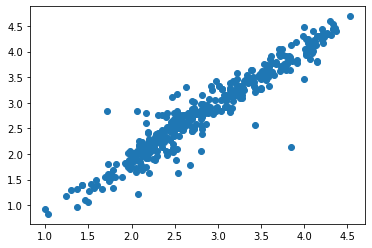

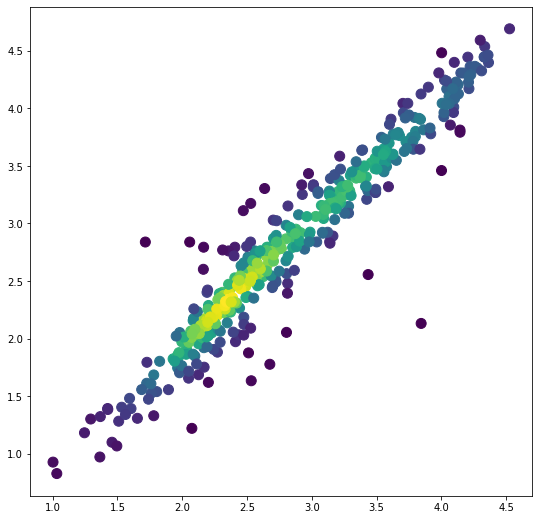

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
x = np.array(another_df['Pred Y'])
y = np.array(another_df['Yield (Tonnes/Hectare)'])

plt.scatter(x, y)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,9)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

In [ ]:
# Visualization of the Prediction
another_df = y_test.to_frame()
another_df['Year'] = X_test['Year']
another_df['Pred Y'] = y2
another_df.sort_values(by='Year', inplace=True)
another_df.reset_index(inplace=True)

fig = px.box(another_df, x=another_df['Year'], y='Pred Y')
fig.add_trace(go.Box(x=another_df['Year'], y=another_df['Yield (Tonnes/Hectare)'], name='Yield'))

fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(title='Random Forest Model(only on test set)')
fig.show()

In [ ]:
fig=px.scatter(another_df,x='Yield (Tonnes/Hectare)',y='Pred Y',height=600,width=600)
fig.show()

##ANN


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
X_train

Year    January  ...  District_TONK  District_UDAIPUR
5    2006   0.000000  ...              0                 0
409  2016  13.500000  ...              1                 0
185  2016   0.000000  ...              0                 0
290  2008   0.000000  ...              0                 0
382  2008   0.000000  ...              0                 0
..    ...        ...  ...            ...               ...
339  2003   5.575101  ...              0                 0
136  2005   2.400000  ...              0                 0
133  2002   1.509000  ...              0                 0
361  2006   0.000000  ...              0                 0
340  2004   2.700000  ...              0                 0

[324 rows x 52 columns]

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(120, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(90, activation='relu'))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(45, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='relu'))
ann.add(tf.keras.layers.Dense(1, activation='linear'))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 120)               6360      
_________________________________________________________________
dense_25 (Dense)             (None, 90)                10890     
_________________________________________________________________
dense_26 (Dense)             (None, 60)                5460      
_________________________________________________________________
dense_27 (Dense)             (None, 45)                2745      
_________________________________________________________________
dense_28 (Dense)             (None, 30)                1380      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 31        
Total params: 26,866
Trainable params: 26,866
Non-trainable params: 0
__________________________________________________

In [ ]:
ann.fit(X_train, y_train, epochs=3000)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.2172 - mean_squared_error: 0.2172
Epoch 502/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.2251 - mean_squared_error: 0.2251
Epoch 503/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.2615 - mean_squared_error: 0.2615
Epoch 504/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.3765 - mean_squared_error: 0.3765
Epoch 505/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.3351 - mean_squared_error: 0.3351
Epoch 506/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.2596 - mean_squared_error: 0.2596
Epoch 507/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.3307 - mean_squared_error: 0.3307
Epoch 508/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.3281 - mean_squared_error: 0.3281
Epoch 509/3000
11/11 [==============================]

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

0.3834856207327172
0.4503500755316495
RMSE via prediction on training set:  0.3834856207327172
Mean Absolute Error: [0.28493582]
R squared via prediction on training set:  0.7730739272715245
RMSE via prediction on test set:  0.4503500755316495
Mean Absolute Error: [0.34196237]
R squared via prediction on test set:  0.6806820967496138


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

RMSE via prediction on test set:  0.31651062840159666
Mean Absolute Error: [0.19308109]
R squared via prediction on test set:  0.8422754179005654


In [ ]:
another_df = y_test.to_frame()
another_df['Year'] = X_test['Year']
another_df['Pred Y'] = pred
another_df.sort_values(by='Year', inplace=True)
another_df.reset_index(inplace=True)

fig = px.box(another_df, x=another_df['Year'], y='Pred Y')
fig.add_trace(go.Box(x=another_df['Year'], y=another_df['Yield (Tonnes/Hectare)'], name='Yield'))

fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(title='ANN(only on test set)')
fig.show()

In [ ]:
fig=px.scatter(another_df,x='Yield (Tonnes/Hectare)',y='Pred Y',height=600,width=600)
fig.show()

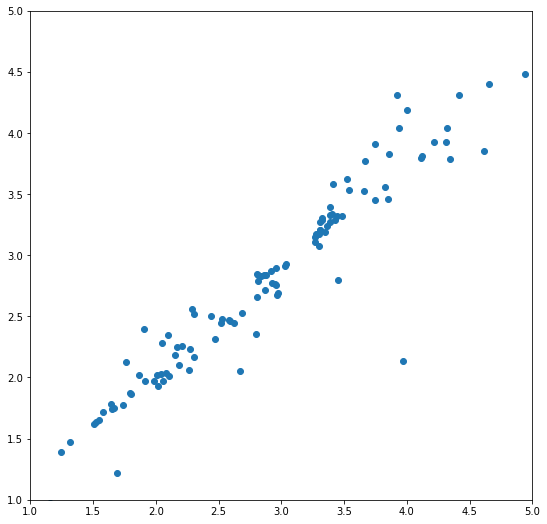

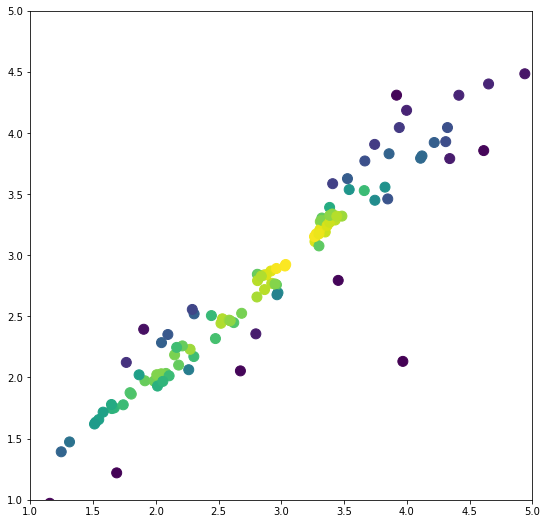

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
x = np.array(another_df['Pred Y'])
y = np.array(another_df['Yield (Tonnes/Hectare)'])
plt.xlim([1, 5])
plt.ylim([1, 5])
plt.scatter(x, y)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,9)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.xlim([1, 5])
plt.ylim([1, 5])
plt.show()

##ANN


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/NERT.csv')

In [ ]:
df.columns

Index(['Year', 'January', 'February', 'March', 'October', 'November',
       'December', 'Annual Total', 'FNMinimum', 'FNMaximum', 'FNMean',
       'FNStandard Deviation', 'FNVariance', 'Season', 'Area (Hectare)',
       'Production (Tonnes)', 'Yield (Tonnes/Hectare)', 'JNMinimum',
       'JNMaximum', 'JNMean', 'JNStandard Deviation', 'JNVariance',
       'FEMinimum', 'FEMaximum', 'FEMean', 'FEStandard Deviation',
       'FEVariance', 'JEMinimum', 'JEMaximum', 'JEMean',
       'JEStandard Deviation', 'JEVariance', 'TminJ', 'TmaxJ', 'TmeanJ',
       'TminF', 'TmaxF', 'TmeanF', 'TminD', 'TmaxD', 'TmeanD',
       'District_AJMER', 'District_ALWAR', 'District_BANSWARA',
       'District_BHARATPUR', 'District_BHILWARA', 'District_BIKANER',
       'District_BUNDI', 'District_CHURU', 'District_DAUSA',
       'District_DUNGARPUR', 'District_GANGANAGAR', 'District_JAISALMER',
       'District_JHALAWAR', 'District_JODHPUR', 'District_KARAULI',
       'District_KOTA', 'District_NAGAUR', 'District

In [ ]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0.1', 'FNCount', 'FNUpper Quartile', 'FNUpper 1.5 IQR', 'FNMedian', 'FNLower 1.5 IQR', 'FNLower Quartile', 'JNCount', 'JNUpper Quartile', 'JNUpper 1.5 IQR', 'JNMedian', 'JNLower 1.5 IQR', 'JNLower Quartile', 'FECount', 'FEUpper Quartile', 'FEUpper 1.5 IQR', 'FEMedian', 'FELower 1.5 IQR', 'FELower Quartile', 'JECount', 'JEUpper Quartile', 'JEUpper 1.5 IQR', 'JEMedian', 'JELower 1.5 IQR', 'JELower Quartile', 'Season', 'Area (Hectare)', 'Production (Tonnes)'], inplace=True)

In [ ]:
df = pd.get_dummies(data=df, columns=['District'])

In [ ]:
df.shape

(432, 61)

In [ ]:
for col, i in zip(df.columns, df.dtypes):
  print(col, i)

Year int64
January float64
February float64
March float64
October float64
November float64
December float64
Annual Total float64
FNMinimum float64
FNMaximum float64
FNMean float64
FNStandard Deviation float64
FNVariance float64
Yield (Tonnes/Hectare) float64
JNMinimum float64
JNMaximum float64
JNMean float64
JNStandard Deviation float64
JNVariance float64
FEMinimum float64
FEMaximum float64
FEMean float64
FEStandard Deviation float64
FEVariance float64
JEMinimum float64
JEMaximum float64
JEMean float64
JEStandard Deviation float64
JEVariance float64
TminJ float64
TmaxJ float64
TmeanJ float64
TminF float64
TmaxF float64
TmeanF float64
TminD float64
TmaxD float64
TmeanD float64
District_AJMER uint8
District_ALWAR uint8
District_BANSWARA uint8
District_BHARATPUR uint8
District_BHILWARA uint8
District_BIKANER uint8
District_BUNDI uint8
District_CHURU uint8
District_DAUSA uint8
District_DUNGARPUR uint8
District_GANGANAGAR uint8
District_JAISALMER uint8
District_JHALAWAR uint8
District_JODHP

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Yield (Tonnes/Hectare)'), df['Yield (Tonnes/Hectare)'], test_size = 0.25, random_state=8)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
X_train.head()

Year  January  February  ...  District_SIROHI  District_TONK  District_UDAIPUR
5    2006      0.0       0.0  ...                0              0                 0
409  2016     13.5       6.3  ...                0              1                 0
185  2016      0.0       0.0  ...                0              0                 0
290  2008      0.0       0.0  ...                0              0                 0
382  2008      0.0       0.0  ...                1              0                 0

[5 rows x 60 columns]

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(120, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(90, activation='relu'))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(45, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='relu'))
ann.add(tf.keras.layers.Dense(1, activation='linear'))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 120)               7320      
_________________________________________________________________
dense_13 (Dense)             (None, 90)                10890     
_________________________________________________________________
dense_14 (Dense)             (None, 60)                5460      
_________________________________________________________________
dense_15 (Dense)             (None, 45)                2745      
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1380      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 27,826
Trainable params: 27,826
Non-trainable params: 0
__________________________________________________

In [ ]:
ann.fit(X_train, y_train, epochs=3000)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.8335 - mean_squared_error: 0.8335
Epoch 502/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.6123 - mean_squared_error: 0.6123
Epoch 503/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.6814 - mean_squared_error: 0.6814
Epoch 504/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.3174 - mean_squared_error: 0.3174
Epoch 505/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.3164 - mean_squared_error: 0.3164
Epoch 506/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.4326 - mean_squared_error: 0.4326
Epoch 507/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.2993 - mean_squared_error: 0.2993
Epoch 508/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5042 - mean_squared_error: 0.5042
Epoch 509/3000
11/11 [==============================]

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

0.3834856207327172
0.4503500755316495
RMSE via prediction on training set:  0.3834856207327172
Mean Absolute Error: [0.28493582]
R squared via prediction on training set:  0.7730739272715245
RMSE via prediction on test set:  0.4503500755316495
Mean Absolute Error: [0.34196237]
R squared via prediction on test set:  0.6806820967496138


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

RMSE via prediction on training set:  0.22411805411154315
Mean Absolute Error: [0.15374392]
R squared via prediction on training set:  0.9224931806804836


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

RMSE via prediction on test set:  0.31651062840159666
Mean Absolute Error: [0.19308109]
R squared via prediction on test set:  0.8422754179005654


In [ ]:
another_df = y_test.to_frame()
another_df['Year'] = X_test['Year']
another_df['Pred Y'] = pred
another_df.sort_values(by='Year', inplace=True)
another_df.reset_index(inplace=True)

fig = px.box(another_df, x=another_df['Year'], y='Pred Y')
fig.add_trace(go.Box(x=another_df['Year'], y=another_df['Yield (Tonnes/Hectare)'], name='Yield'))

fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(title='ANN(only on test set)')
fig.show()

In [ ]:
fig=px.scatter(another_df,x='Yield (Tonnes/Hectare)',y='Pred Y',height=600,width=600)
fig.show()

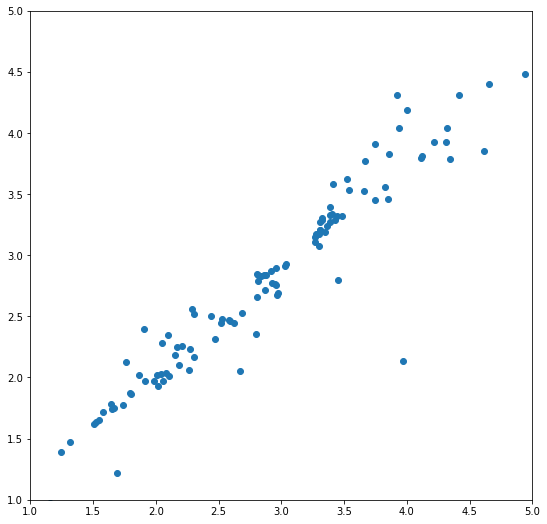

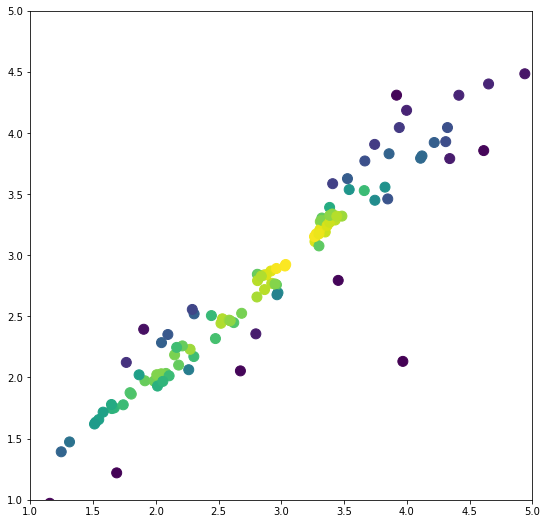

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
x = np.array(another_df['Pred Y'])
y = np.array(another_df['Yield (Tonnes/Hectare)'])
plt.xlim([1, 5])
plt.ylim([1, 5])
plt.scatter(x, y)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,9)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.xlim([1, 5])
plt.ylim([1, 5])
plt.show()

#  LST

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/MOD11A2-006-Statistics (1).csv')

In [ ]:
df.head()

File Name  ... Lower Quartile
0  MOD11A2_006_LST_Night_1km_doy2000049_aid0001  ...         280.94
1  MOD11A2_006_LST_Night_1km_doy2000057_aid0001  ...         285.98
2  MOD11A2_006_LST_Night_1km_doy2000361_aid0001  ...         281.24
3  MOD11A2_006_LST_Night_1km_doy2001001_aid0001  ...         279.74
4  MOD11A2_006_LST_Night_1km_doy2001009_aid0001  ...         278.84

[5 rows x 16 columns]

In [ ]:
df.dtypes

File Name              object
Dataset                object
aid                    object
Date                   object
Count                 float64
Minimum               float64
Maximum               float64
Range                  object
Mean                  float64
Standard Deviation    float64
Variance              float64
Upper Quartile        float64
Upper 1.5 IQR         float64
Median                float64
Lower 1.5 IQR         float64
Lower Quartile        float64
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

File Name                     object
Dataset                       object
aid                           object
Date                  datetime64[ns]
Count                        float64
Minimum                      float64
Maximum                      float64
Range                         object
Mean                         float64
Standard Deviation           float64
Variance                     float64
Upper Quartile               float64
Upper 1.5 IQR                float64
Median                       float64
Lower 1.5 IQR                float64
Lower Quartile               float64
dtype: object

In [ ]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [ ]:
df.columns

Index(['File Name', 'Dataset', 'aid', 'Date', 'Count', 'Minimum', 'Maximum',
       'Range', 'Mean', 'Standard Deviation', 'Variance', 'Upper Quartile',
       'Upper 1.5 IQR', 'Median', 'Lower 1.5 IQR', 'Lower Quartile', 'Year',
       'Month'],
      dtype='object')

In [ ]:
agf={'File Name':'first','Date':'first','Minimum':'mean','Maximum':'mean','Mean':'mean','Minimum':'mean','Year':'first','Month':'first','aid':'first','Month':'first','Year':'first'}
rdf=df.groupby(['Year','Month','aid']).agg(agf)
rdf

File Name  ...      aid
Year Month aid                                                    ...         
2000 2     aid0001  MOD11A2_006_LST_Night_1km_doy2000049_aid0001  ...  aid0001
           aid0002  MOD11A2_006_LST_Night_1km_doy2000049_aid0002  ...  aid0002
           aid0003  MOD11A2_006_LST_Night_1km_doy2000049_aid0003  ...  aid0003
           aid0004  MOD11A2_006_LST_Night_1km_doy2000049_aid0004  ...  aid0004
           aid0005  MOD11A2_006_LST_Night_1km_doy2000049_aid0005  ...  aid0005
...                                                          ...  ...      ...
2021 2     aid0028  MOD11A2_006_LST_Night_1km_doy2021033_aid0028  ...  aid0028
           aid0029  MOD11A2_006_LST_Night_1km_doy2021033_aid0029  ...  aid0029
           aid0030  MOD11A2_006_LST_Night_1km_doy2021033_aid0030  ...  aid0030
           aid0031  MOD11A2_006_LST_Night_1km_doy2021033_aid0031  ...  aid0031
           aid0032  MOD11A2_006_LST_Night_1km_doy2021033_aid0032  ...  aid0032

[2048 rows x 8 columns]

In [ ]:
rdf.columns

Index(['File Name', 'Date', 'Minimum', 'Maximum', 'Mean', 'Year', 'Month',
       'aid'],
      dtype='object')

In [ ]:
rdf

File Name  ...      aid
Year Month aid                                                    ...         
2000 2     aid0001  MOD11A2_006_LST_Night_1km_doy2000049_aid0001  ...  aid0001
           aid0002  MOD11A2_006_LST_Night_1km_doy2000049_aid0002  ...  aid0002
           aid0003  MOD11A2_006_LST_Night_1km_doy2000049_aid0003  ...  aid0003
           aid0004  MOD11A2_006_LST_Night_1km_doy2000049_aid0004  ...  aid0004
           aid0005  MOD11A2_006_LST_Night_1km_doy2000049_aid0005  ...  aid0005
...                                                          ...  ...      ...
2021 2     aid0028  MOD11A2_006_LST_Night_1km_doy2021033_aid0028  ...  aid0028
           aid0029  MOD11A2_006_LST_Night_1km_doy2021033_aid0029  ...  aid0029
           aid0030  MOD11A2_006_LST_Night_1km_doy2021033_aid0030  ...  aid0030
           aid0031  MOD11A2_006_LST_Night_1km_doy2021033_aid0031  ...  aid0031
           aid0032  MOD11A2_006_LST_Night_1km_doy2021033_aid0032  ...  aid0032

[2048 rows x 8 columns]

In [ ]:
rdf["aid"]= rdf["aid"].str.replace('aid0001', 'Karauli')
rdf["aid"]= rdf["aid"].str.replace('aid0002', 'Kota')
rdf["aid"]= rdf["aid"].str.replace('aid0003', 'Nagaur')
rdf["aid"]= rdf["aid"].str.replace('aid0004', 'Pali')
rdf["aid"]= rdf["aid"].str.replace('aid0005', 'Rajsamand')
rdf["aid"]= rdf["aid"].str.replace('aid0006', 'Sawai Madhopur')
rdf["aid"]= rdf["aid"].str.replace('aid0007', 'Sikar')
rdf["aid"]= rdf["aid"].str.replace('aid0008', 'Sirohi')
rdf["aid"]= rdf["aid"].str.replace('aid0009', 'Tonk')
rdf["aid"]= rdf["aid"].str.replace('aid0010', 'Udaipur')
rdf["aid"]= rdf["aid"].str.replace('aid0011', 'Ajmer')
rdf["aid"]= rdf["aid"].str.replace('aid0012', 'Alwar')
rdf["aid"]= rdf["aid"].str.replace('aid0013', 'Banswara')
rdf["aid"]= rdf["aid"].str.replace('aid0014', 'Baran')
rdf["aid"]= rdf["aid"].str.replace('aid0015', 'Barmer')
rdf["aid"]= rdf["aid"].str.replace('aid0016', 'Bharatpur')
rdf["aid"]= rdf["aid"].str.replace('aid0017', 'Bhilwara')
rdf["aid"]= rdf["aid"].str.replace('aid0018', 'Bikaner')
rdf["aid"]= rdf["aid"].str.replace('aid0019', 'Bundi')
rdf["aid"]= rdf["aid"].str.replace('aid0020', 'Chittaurgarh')
rdf["aid"]= rdf["aid"].str.replace('aid0021', 'Churu')
rdf["aid"]= rdf["aid"].str.replace('aid0022', 'Dausa')
rdf["aid"]= rdf["aid"].str.replace('aid0023', 'Dhaulpur')
rdf["aid"]= rdf["aid"].str.replace('aid0024', 'Dungarpur')
rdf["aid"]= rdf["aid"].str.replace('aid0025', 'Ganganagar')
rdf["aid"]= rdf["aid"].str.replace('aid0026', 'Hanumangarh')
rdf["aid"]= rdf["aid"].str.replace('aid0027', 'Jaipur')
rdf["aid"]= rdf["aid"].str.replace('aid0028', 'Jaisalmer')
rdf["aid"]= rdf["aid"].str.replace('aid0029', 'Jalor')
rdf["aid"]= rdf["aid"].str.replace('aid0030', 'Jhalawar')
rdf["aid"]= rdf["aid"].str.replace('aid0031', 'Jhunjhunun')
rdf["aid"]= rdf["aid"].str.replace('aid0032', 'Jodhpur')

In [ ]:
lstjan=rdf.loc[rdf['Month']==1]
lstfeb=rdf.loc[rdf['Month']==2]
lstdec=rdf.loc[rdf['Month']==12]

In [ ]:
rdf.dtypes

File Name            object
Date         datetime64[ns]
Minimum             float64
Maximum             float64
Mean                float64
Year                  int64
Month                 int64
aid                  object
dtype: object

In [ ]:
lstjan

File Name  ...         aid
Year Month aid                                                    ...            
2001 1     aid0001  MOD11A2_006_LST_Night_1km_doy2001001_aid0001  ...     Karauli
           aid0002  MOD11A2_006_LST_Night_1km_doy2001001_aid0002  ...        Kota
           aid0003  MOD11A2_006_LST_Night_1km_doy2001001_aid0003  ...      Nagaur
           aid0004  MOD11A2_006_LST_Night_1km_doy2001001_aid0004  ...        Pali
           aid0005  MOD11A2_006_LST_Night_1km_doy2001001_aid0005  ...   Rajsamand
...                                                          ...  ...         ...
2021 1     aid0028  MOD11A2_006_LST_Night_1km_doy2021001_aid0028  ...   Jaisalmer
           aid0029  MOD11A2_006_LST_Night_1km_doy2021001_aid0029  ...       Jalor
           aid0030  MOD11A2_006_LST_Night_1km_doy2021001_aid0030  ...    Jhalawar
           aid0031  MOD11A2_006_LST_Night_1km_doy2021001_aid0031  ...  Jhunjhunun
           aid0032  MOD11A2_006_LST_Night_1km_doy2021001_aid0032  ...     Jodhpur

[672 rows x 8 columns]

In [ ]:
lstfeb

File Name  ...         aid
Year Month aid                                                    ...            
2000 2     aid0001  MOD11A2_006_LST_Night_1km_doy2000049_aid0001  ...     Karauli
           aid0002  MOD11A2_006_LST_Night_1km_doy2000049_aid0002  ...        Kota
           aid0003  MOD11A2_006_LST_Night_1km_doy2000049_aid0003  ...      Nagaur
           aid0004  MOD11A2_006_LST_Night_1km_doy2000049_aid0004  ...        Pali
           aid0005  MOD11A2_006_LST_Night_1km_doy2000049_aid0005  ...   Rajsamand
...                                                          ...  ...         ...
2021 2     aid0028  MOD11A2_006_LST_Night_1km_doy2021033_aid0028  ...   Jaisalmer
           aid0029  MOD11A2_006_LST_Night_1km_doy2021033_aid0029  ...       Jalor
           aid0030  MOD11A2_006_LST_Night_1km_doy2021033_aid0030  ...    Jhalawar
           aid0031  MOD11A2_006_LST_Night_1km_doy2021033_aid0031  ...  Jhunjhunun
           aid0032  MOD11A2_006_LST_Night_1km_doy2021033_aid0032  ...     Jodhpur

[704 rows x 8 columns]

In [ ]:
lstdec

File Name  ...         aid
Year Month aid                                                    ...            
2000 12    aid0001  MOD11A2_006_LST_Night_1km_doy2000361_aid0001  ...     Karauli
           aid0002  MOD11A2_006_LST_Night_1km_doy2000361_aid0002  ...        Kota
           aid0003  MOD11A2_006_LST_Night_1km_doy2000361_aid0003  ...      Nagaur
           aid0004  MOD11A2_006_LST_Night_1km_doy2000361_aid0004  ...        Pali
           aid0005  MOD11A2_006_LST_Night_1km_doy2000361_aid0005  ...   Rajsamand
...                                                          ...  ...         ...
2020 12    aid0028  MOD11A2_006_LST_Night_1km_doy2020361_aid0028  ...   Jaisalmer
           aid0029  MOD11A2_006_LST_Night_1km_doy2020361_aid0029  ...       Jalor
           aid0030  MOD11A2_006_LST_Night_1km_doy2020361_aid0030  ...    Jhalawar
           aid0031  MOD11A2_006_LST_Night_1km_doy2020361_aid0031  ...  Jhunjhunun
           aid0032  MOD11A2_006_LST_Night_1km_doy2020361_aid0032  ...     Jodhpur

[672 rows x 8 columns]

In [ ]:
from google.colab import files 
lstjan.to_csv('lstjan.csv')
files.download('lstjan.csv')
lstfeb.to_csv('lstfeb.csv')
files.download('lstfeb.csv')
lstdec.to_csv('lstdec.csv')
files.download('lstdec.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lstjan=pd.read_csv('lstjan.csv')
lstfeb=pd.read_csv('lstfeb.csv')
lstdec=pd.read_csv('lstdec.csv')

In [ ]:
LST=lstjan.merge(lstfeb,how='inner',left_on=['Year','District'],right_on=['Year','District'])

In [ ]:
LST=LST.merge(lstdec,how='inner',left_on=['Year','District'],right_on=['Year','District'])

In [ ]:
LST=pd.read_csv('/content/LST.csv')

In [ ]:
LST.head()

Unnamed: 0  Year   TminJ    TmaxJ  ...      TmeanF   TminD   TmaxD      TmeanD
0           0  2001  291.84  302.475  ...  303.861677  291.52  301.60  297.788961
1           1  2001  293.73  306.005  ...  303.334983  293.80  303.54  298.660679
2           2  2001  294.71  306.605  ...  306.784010  292.96  305.58  301.226763
3           3  2001  295.36  307.645  ...  307.941678  294.44  306.18  302.229489
4           4  2001  296.57  306.445  ...  306.611264  295.64  303.32  299.602472

[5 rows x 12 columns]

In [ ]:
from google.colab import files 
LST.to_csv('LST.csv')
files.download('LST.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LST.dtypes

Year          int64
TminJ       float64
TmaxJ       float64
TmeanJ      float64
District     object
TminF       float64
TmaxF       float64
TmeanF      float64
TminD       float64
TmaxD       float64
TmeanD      float64
dtype: object

In [ ]:
NER=NDVI_EVI_Rainfall
NER.head()

Unnamed: 0 District  Year  ...  JEMedian  JELower 1.5 IQR  JELower Quartile
0           0    AJMER  2001  ...    0.1478           0.0811            0.1320
1           1    AJMER  2002  ...    0.1541           0.0753            0.1378
2           2    AJMER  2003  ...    0.1209           0.0746            0.1100
3           3    AJMER  2004  ...    0.1533           0.0922            0.1392
4           4    AJMER  2005  ...    0.1547           0.0732            0.1385

[5 rows x 59 columns]

In [ ]:
lstjan.dtypes

Year          int64
TminJ       float64
TmaxJ       float64
TmeanJ      float64
District     object
dtype: object

In [ ]:
NER.columns

Index(['Unnamed: 0', 'District', 'Year', 'January', 'February', 'March',
       'October', 'November', 'December', 'Annual Total', 'Unnamed: 0.1',
       'FNCount', 'FNMinimum', 'FNMaximum', 'FNMean', 'FNStandard Deviation',
       'FNVariance', 'FNUpper Quartile', 'FNUpper 1.5 IQR', 'FNMedian',
       'FNLower 1.5 IQR', 'FNLower Quartile', 'Season', 'Area (Hectare)',
       'Production (Tonnes)', 'Yield (Tonnes/Hectare)', 'JNCount', 'JNMinimum',
       'JNMaximum', 'JNMean', 'JNStandard Deviation', 'JNVariance',
       'JNUpper Quartile', 'JNUpper 1.5 IQR', 'JNMedian', 'JNLower 1.5 IQR',
       'JNLower Quartile', 'FECount', 'FEMinimum', 'FEMaximum', 'FEMean',
       'FEStandard Deviation', 'FEVariance', 'FEUpper Quartile',
       'FEUpper 1.5 IQR', 'FEMedian', 'FELower 1.5 IQR', 'FELower Quartile',
       'JECount', 'JEMinimum', 'JEMaximum', 'JEMean', 'JEStandard Deviation',
       'JEVariance', 'JEUpper Quartile', 'JEUpper 1.5 IQR', 'JEMedian',
       'JELower 1.5 IQR', 'JELower Qua

In [ ]:
NER['District']=NER['District'].astype('str')

AttributeError: ignored

In [ ]:
LST['District']=LST['District'].str.upper()

In [ ]:
LST.dtypes

Year          int64
TminJ       float64
TmaxJ       float64
TmeanJ      float64
District     object
TminF       float64
TmaxF       float64
TmeanF      float64
TminD       float64
TmaxD       float64
TmeanD      float64
dtype: object

In [ ]:
import sys

sys.setrecursionlimit(10000000)
print(sys.getrecursionlimit())

10000000


In [ ]:
NER.shape

(434, 57)

In [ ]:
NER.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [ ]:
LST.shape

(637, 11)

In [ ]:
NER.head()

Unnamed: 0 District  Year  ...  JEMedian  JELower 1.5 IQR  JELower Quartile
0           0    AJMER  2001  ...    0.1478           0.0811            0.1320
1           1    AJMER  2002  ...    0.1541           0.0753            0.1378
2           2    AJMER  2003  ...    0.1209           0.0746            0.1100
3           3    AJMER  2004  ...    0.1533           0.0922            0.1392
4           4    AJMER  2005  ...    0.1547           0.0732            0.1385

[5 rows x 59 columns]

In [ ]:
LST.head()

Unnamed: 0  Year   TminJ    TmaxJ  ...      TmeanF   TminD   TmaxD      TmeanD
0           0  2001  291.84  302.475  ...  303.861677  291.52  301.60  297.788961
1           1  2001  293.73  306.005  ...  303.334983  293.80  303.54  298.660679
2           2  2001  294.71  306.605  ...  306.784010  292.96  305.58  301.226763
3           3  2001  295.36  307.645  ...  307.941678  294.44  306.18  302.229489
4           4  2001  296.57  306.445  ...  306.611264  295.64  303.32  299.602472

[5 rows x 12 columns]

In [ ]:
NERT=NER.merge(LST,how='inner',left_on=['Year','District'],right_on=['Year','District'])

In [ ]:
NERT

Unnamed: 0_x District  Year  ...   TminD   TmaxD      TmeanD
0               0    AJMER  2001  ...  295.12  304.20  300.720591
1               1    AJMER  2002  ...  295.38  304.84  301.657983
2               2    AJMER  2003  ...  292.66  300.66  297.616190
3               3    AJMER  2004  ...  290.64  304.26  298.669378
4               4    AJMER  2005  ...  292.28  302.60  298.687159
..            ...      ...   ...  ...     ...     ...         ...
427           429  UDAIPUR  2015  ...  294.26  308.30  303.906432
428           430  UDAIPUR  2016  ...  294.46  303.92  300.270099
429           431  UDAIPUR  2017  ...  292.98  303.14  299.428832
430           432  UDAIPUR  2018  ...  292.16  301.98  298.046983
431           433  UDAIPUR  2019  ...  291.86  299.64  295.497895

[432 rows x 69 columns]

In [ ]:
NERT.to_csv('NERT.csv')
files.download('NERT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Implementing CNN on the dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
NDVI_files_with_yield = pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/NDVI_with_file_names.csv')

In [ ]:
NDVI_files_with_yield.drop(columns='Unnamed: 0', inplace=True)
NDVI_files_with_yield.columns

Index(['File Name', 'District', 'Date', 'Count', 'Minimum', 'Maximum', 'Mean',
       'Standard Deviation', 'Variance', 'Upper Quartile', 'Upper 1.5 IQR',
       'Median', 'Lower 1.5 IQR', 'Lower Quartile', 'Year',
       'State/Crop/District', 'Season', 'Area (Hectare)',
       'Production (Tonnes)', 'Yield (Tonnes/Hectare)'],
      dtype='object')

In [ ]:
NDVI_files_with_yield[['File Name', 'Yield (Tonnes/Hectare)']].head()

File Name  Yield (Tonnes/Hectare)
0  MOD13A3_006__1_km_monthly_NDVI_doy2001001_aid0001                1.921016
1  MOD13A3_006__1_km_monthly_NDVI_doy2001032_aid0001                1.921016
2  MOD13A3_006__1_km_monthly_NDVI_doy2002001_aid0001                3.156677
3  MOD13A3_006__1_km_monthly_NDVI_doy2002032_aid0001                3.156677
4  MOD13A3_006__1_km_monthly_NDVI_doy2003001_aid0001                2.479874

In [ ]:
NDVI_files_with_yield.shape

(1064, 20)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

We're going to make 3 seperate folders such that any values above the upper quartile of yield(district-wise) will be saved in the 'High' folder, between Upper and Lower quartile will be saved in the 'Medium' folder, and anything below the Lower quartile will be saved in the 'Low' folder.

In [ ]:
fig=px.box(NDVI_files_with_yield, x='District', y='Yield (Tonnes/Hectare)')
fig.show()

In [ ]:
NDVI_files_with_yield['District'].unique()

array(['KARAULI', 'KOTA', 'NAGAUR', 'PALI', 'RAJSAMAND', 'SAWAI MADHOPUR',
       'SIKAR', 'SIROHI', 'TONK', 'UDAIPUR', 'AJMER', 'ALWAR', 'BANSWARA',
       'BARAN', 'BARMER', 'BHARATPUR', 'BHILWARA', 'BIKANER', 'BUNDI',
       'CHURU', 'DAUSA', 'DUNGARPUR', 'GANGANAGAR', 'HANUMANGARH',
       'JAIPUR', 'JAISALMER', 'JHALAWAR', 'JODHPUR'], dtype=object)

In [ ]:
NDVI_files_with_yield.loc[NDVI_files_with_yield['District'] == 'KOTA']['Yield (Tonnes/Hectare)'].quantile([0.25, 0.75])

0.25    2.961619
0.75    4.130813
Name: Yield (Tonnes/Hectare), dtype: float64

In [ ]:
low = []
medium = []
high = []
for district in NDVI_files_with_yield['District'].unique():
  # Stores values of upper and lower quartile in a pandas series
  district_quartile = NDVI_files_with_yield.loc[NDVI_files_with_yield['District'] == district]['Yield (Tonnes/Hectare)'].quantile([0.25, 0.75])
  for file_name, yield_val in zip(NDVI_files_with_yield.loc[NDVI_files_with_yield['District'] == district]['File Name'], NDVI_files_with_yield.loc[NDVI_files_with_yield['District'] == district]['Yield (Tonnes/Hectare)']):
    if yield_val < district_quartile[0.25]:
      low.append(file_name)
    elif yield_val >= district_quartile[0.25] and yield_val <= district_quartile[0.75]:
      medium.append(file_name)
    else:
      high.append(file_name)

Using these arrays to move files to their respective folders

In [ ]:
print('Low =', low)
print('Medium =', medium)
print('High =', high)

Low = ['MOD13A3_006__1_km_monthly_NDVI_doy2001001_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2001032_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2002001_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2002032_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2003001_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2003032_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2005001_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2005032_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2007001_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2007032_aid0001', 'MOD13A3_006__1_km_monthly_NDVI_doy2001001_aid0002', 'MOD13A3_006__1_km_monthly_NDVI_doy2001032_aid0002', 'MOD13A3_006__1_km_monthly_NDVI_doy2002001_aid0002', 'MOD13A3_006__1_km_monthly_NDVI_doy2002032_aid0002', 'MOD13A3_006__1_km_monthly_NDVI_doy2003001_aid0002', 'MOD13A3_006__1_km_monthly_NDVI_doy2003032_aid0002', 'MOD13A3_006__1_km_monthly_NDVI_doy2004001_aid0002', 'MOD13A3_006__1_km_monthly_NDVI_doy2004032_aid0002', 'MOD13A3_006__1_km_monthly_NDVI_doy2015

In [ ]:
print(len(low))
print(len(medium))
print(len(high))

280
504
280


In [ ]:
for i in range(len(low)):
  low[i] = low[i].replace('_', '.', 1)

for i in range(len(medium)):
  medium[i] = medium[i].replace('_', '.', 1)

for i in range(len(high)):
  high[i] = high[i].replace('_', '.', 1)

In [ ]:
print('Low =', low)
print('Medium =', medium)
print('High =', high)

Low = ['MOD13A3.006__1_km_monthly_NDVI_doy2001001_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2001032_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2002001_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2002032_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2003001_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2003032_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2005001_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2005032_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2007001_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2007032_aid0001', 'MOD13A3.006__1_km_monthly_NDVI_doy2001001_aid0002', 'MOD13A3.006__1_km_monthly_NDVI_doy2001032_aid0002', 'MOD13A3.006__1_km_monthly_NDVI_doy2002001_aid0002', 'MOD13A3.006__1_km_monthly_NDVI_doy2002032_aid0002', 'MOD13A3.006__1_km_monthly_NDVI_doy2003001_aid0002', 'MOD13A3.006__1_km_monthly_NDVI_doy2003032_aid0002', 'MOD13A3.006__1_km_monthly_NDVI_doy2004001_aid0002', 'MOD13A3.006__1_km_monthly_NDVI_doy2004032_aid0002', 'MOD13A3.006__1_km_monthly_NDVI_doy2015

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

File location: '/content/drive/MyDrive/NDVI seperated by district/MOD13A3.006__1_km_monthly_NDVI_doy2000032_aid0001.tif'

In [ ]:
for file_name in low:
  try:
    shutil.move('content/drive/MyDrive/NDVI seperated by district/' + file_name + '.tif', 'content/drive/MyDrive/NDVI sorted via Yield/Low/' + file_name + '.tif')
  except FileNotFoundError:
    print('File not found: ', file_name)
    continue

for file_name in medium:
  try:
    shutil.move('content/drive/MyDrive/NDVI seperated by district/' + file_name + '.tif', 'content/drive/MyDrive/NDVI sorted via Yield/Medium/' + file_name + '.tif')
  except FileNotFoundError:
    print('File not found: ', file_name)
    continue

for file_name in high:
  try:
    shutil.move('content/drive/MyDrive/NDVI seperated by district/' + file_name + '.tif', 'content/drive/MyDrive/NDVI sorted via Yield/High/' + file_name + '.tif')
  except FileNotFoundError:
    print('File not found: ', file_name)
    continue

# Leaf Area Index Data from Satellite to DataFrame

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
lai_df = pd.read_csv('/content/MOD15A2H-006-Statistics.csv')

FileNotFoundError: ignored

In [ ]:
lai_df.columns

In [ ]:
lai_df.drop(columns=['Count', 'Range', 'Upper Quartile', 'Upper 1.5 IQR', 'Median', 'Lower 1.5 IQR', 'Lower Quartile', 'Dataset'], inplace=True)

In [ ]:
lai_df.head()

In [ ]:
lai_df['Date'] = pd.to_datetime(lai_df['Date'])

In [ ]:
lai_df["aid"]= lai_df["aid"].str.replace('aid0001', 'Karauli')
lai_df["aid"]= lai_df["aid"].str.replace('aid0002', 'Kota')
lai_df["aid"]= lai_df["aid"].str.replace('aid0003', 'Nagaur')
lai_df["aid"]= lai_df["aid"].str.replace('aid0004', 'Pali')
lai_df["aid"]= lai_df["aid"].str.replace('aid0005', 'Rajsamand')
lai_df["aid"]= lai_df["aid"].str.replace('aid0006', 'Sawai Madhopur')
lai_df["aid"]= lai_df["aid"].str.replace('aid0007', 'Sikar')
lai_df["aid"]= lai_df["aid"].str.replace('aid0008', 'Sirohi')
lai_df["aid"]= lai_df["aid"].str.replace('aid0009', 'Tonk')
lai_df["aid"]= lai_df["aid"].str.replace('aid0010', 'Udaipur')
lai_df["aid"]= lai_df["aid"].str.replace('aid0011', 'Ajmer')
lai_df["aid"]= lai_df["aid"].str.replace('aid0012', 'Alwar')
lai_df["aid"]= lai_df["aid"].str.replace('aid0013', 'Banswara')
lai_df["aid"]= lai_df["aid"].str.replace('aid0014', 'Baran')
lai_df["aid"]= lai_df["aid"].str.replace('aid0015', 'Barmer')
lai_df["aid"]= lai_df["aid"].str.replace('aid0016', 'Bharatpur')
lai_df["aid"]= lai_df["aid"].str.replace('aid0017', 'Bhilwara')
lai_df["aid"]= lai_df["aid"].str.replace('aid0018', 'Bikaner')
lai_df["aid"]= lai_df["aid"].str.replace('aid0019', 'Bundi')
lai_df["aid"]= lai_df["aid"].str.replace('aid0020', 'Chittaurgarh')
lai_df["aid"]= lai_df["aid"].str.replace('aid0021', 'Churu')
lai_df["aid"]= lai_df["aid"].str.replace('aid0022', 'Dausa')
lai_df["aid"]= lai_df["aid"].str.replace('aid0023', 'Dhaulpur')
lai_df["aid"]= lai_df["aid"].str.replace('aid0024', 'Dungarpur')
lai_df["aid"]= lai_df["aid"].str.replace('aid0025', 'Ganganagar')
lai_df["aid"]= lai_df["aid"].str.replace('aid0026', 'Hanumangarh')
lai_df["aid"]= lai_df["aid"].str.replace('aid0027', 'Jaipur')
lai_df["aid"]= lai_df["aid"].str.replace('aid0028', 'Jaisalmer')
lai_df["aid"]= lai_df["aid"].str.replace('aid0029', 'Jalor')
lai_df["aid"]= lai_df["aid"].str.replace('aid0030', 'Jhalawar')
lai_df["aid"]= lai_df["aid"].str.replace('aid0031', 'Jhunjhunun')
lai_df["aid"]= lai_df["aid"].str.replace('aid0032', 'Jodhpur')

In [ ]:
lai_df['District'] = lai_df['aid']
lai_df.drop(columns='aid', inplace=True)

In [ ]:
lai_df['Year']=lai_df['Date'].dt.year
lai_df['Month']=lai_df['Date'].dt.month

In [ ]:
lai_df.dtypes

In [ ]:
agf={'File Name':'first', 'Date':'first', 'Minimum':'mean', 'Maximum':'mean', 'Mean':'mean', 'Standard Deviation':'mean', 'Variance':'mean', 'District':'first'}
grouped_lai_df=lai_df.groupby(['Year','Month','District']).agg(agf)
grouped_lai_df.head()

In [ ]:
lai_jan=grouped_lai_df.loc[grouped_lai_df['Month']==1]
lai_feb=grouped_lai_df.loc[grouped_lai_df['Month']==2]
lai_dec=grouped_lai_df.loc[grouped_lai_df['Month']==12]

In [ ]:
nert = pd.read_csv('/content/NERT.csv')

In [ ]:
nert.head()

In [ ]:
nertl = nert.merge(lai_df)

#COMPARISONS



##NDVI

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [ ]:
NDVI_EVI_Rainfall = pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/NERT.csv')

In [ ]:
NDVI_EVI_Rainfall.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'District', 'Year', 'January', 'February',
       'March', 'October', 'November', 'December', 'Annual Total',
       'Unnamed: 0.1', 'FNCount', 'FNMinimum', 'FNMaximum', 'FNMean',
       'FNStandard Deviation', 'FNVariance', 'FNUpper Quartile',
       'FNUpper 1.5 IQR', 'FNMedian', 'FNLower 1.5 IQR', 'FNLower Quartile',
       'Season', 'Area (Hectare)', 'Production (Tonnes)',
       'Yield (Tonnes/Hectare)', 'JNCount', 'JNMinimum', 'JNMaximum', 'JNMean',
       'JNStandard Deviation', 'JNVariance', 'JNUpper Quartile',
       'JNUpper 1.5 IQR', 'JNMedian', 'JNLower 1.5 IQR', 'JNLower Quartile',
       'FECount', 'FEMinimum', 'FEMaximum', 'FEMean', 'FEStandard Deviation',
       'FEVariance', 'FEUpper Quartile', 'FEUpper 1.5 IQR', 'FEMedian',
       'FELower 1.5 IQR', 'FELower Quartile', 'JECount', 'JEMinimum',
       'JEMaximum', 'JEMean', 'JEStandard Deviation', 'JEVariance',
       'JEUpper Quartile', 'JEUpper 1.5 IQR', 'JEMedian', 'JELower 1.5 IQ

In [ ]:
NDVI_EVI_Rainfall.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0_x','Season','Annual Total','FNCount','FNStandard Deviation', 'FNVariance', 'FNUpper Quartile',
       'FNUpper 1.5 IQR', 'FNMedian', 'FNLower 1.5 IQR', 'FNLower Quartile','JNCount','JNStandard Deviation', 'JNVariance', 'JNUpper Quartile', 'Annual Total',
       'JNUpper 1.5 IQR', 'JNMedian', 'JNLower 1.5 IQR', 'JNLower Quartile','FEMinimum', 'FEMaximum', 'FEMean', 'FEStandard Deviation',
       'FECount','FEVariance', 'FEUpper Quartile', 'FEUpper 1.5 IQR', 'FEMedian', 'JEMinimum',
       'JEMaximum', 'JEMean', 'JEStandard Deviation',
       'FELower 1.5 IQR', 'FELower Quartile', 'JECount','JEStandard Deviation', 'JEVariance',
       'JEUpper Quartile', 'JEUpper 1.5 IQR', 'JEMedian', 'JELower 1.5 IQR',
       'JELower Quartile', 'Unnamed: 0_y'], inplace=True)

In [ ]:
NDVI_EVI_Rainfall.head()

District  Year   January  February  ...      TmeanF   TminD   TmaxD      TmeanD
0    AJMER  2001  0.640000  0.442000  ...  306.406393  295.12  304.20  300.720591
1    AJMER  2002  0.441000  2.167000  ...  303.192750  295.38  304.84  301.657983
2    AJMER  2003  3.119945  3.192862  ...  303.761230  292.66  300.66  297.616190
3    AJMER  2004  2.300000  0.000000  ...  308.192456  290.64  304.26  298.669378
4    AJMER  2005  0.200000  2.900000  ...  304.424038  292.28  302.60  298.687159

[5 rows x 26 columns]

In [ ]:
NDVI_EVI_Rainfall = pd.get_dummies(data=NDVI_EVI_Rainfall, columns=['District'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(NDVI_EVI_Rainfall.drop(columns='Yield (Tonnes/Hectare)'), NDVI_EVI_Rainfall['Yield (Tonnes/Hectare)'], test_size = 0.25, random_state=8)

In [ ]:
print('Size of X_train =', X_train.shape)
print('Size of X_test =', X_test.shape)

Size of X_train = (324, 47)
Size of X_test = (108, 47)


In [ ]:
NDVI_Train=pd.DataFrame(y_train,columns=['Train_y'])
NDVI_Train['Train_y']=y_train
NDVI_Test=pd.DataFrame(y_test,columns=['Test_y'])
NDVI_Test['Test_y']=y_test


###Decision Tree

In [ ]:
dtree = DecisionTreeRegressor(max_depth=4, random_state=1)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))
NDVI_Train['Train_DT']=tr1

RMSE via prediction on training set:  0.35712377549585994
Mean Absolute Error: [0.2777117]
R squared via prediction on training set:  0.8032006057501475


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))
NDVI_Test['Test_DT']=y1

RMSE via prediction on test set:  0.533953974924175
Mean Absolute Error: [0.39841953]
R squared via prediction on test set:  0.5511198127932873


###Random forest


In [ ]:
model_rf = RandomForestRegressor(n_estimators=15, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))
NDVI_Train['Train_RF']=tr2

RMSE via prediction on training set:  0.2598816788515812
Mean Absolute Error: [0.20332093]
R squared via prediction on training set:  0.8957832426716223


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))
NDVI_Test['Test_RF']=y2

RMSE via prediction on test set:  0.39174304978624036
Mean Absolute Error: [0.28993412]
R squared via prediction on test set:  0.7583841674916096


###Non Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=500
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02402351450611917, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03933128237230221, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2895365300528763, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2448778952329409, toleran

RMSE =  6.674334985104013
MAE  0.32346451104532964
test_score =  0.3505958886463869
RMSE =  5.307129513823541
MAE  0.2319234524024306
Train =  0.865859293031561
For degree  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02089105537724123, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0453453867249074, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2387520007165289, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18869916441030554, toleran

KeyboardInterrupt: ignored

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ',RMSE1) 
print('Mean Absolute Error:',MAE1)
print('R squared via prediction on training set: ', test_score1)
NDVI_Train['Train_NL']=train_pred

RMSE via prediction on training set:  5.307129513823541
Mean Absolute Error: 0.2319234524024306
R squared via prediction on training set:  0.865859293031561


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', RMSE) 
print('Mean Absolute Error:',MAE)
print('R squared via prediction on test set: ', test_score)
NDVI_Test['Test_NL']=pred

RMSE via prediction on test set:  6.674334985104013
Mean Absolute Error: 0.32346451104532964
R squared via prediction on test set:  0.3505958886463869


###SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='rbf',C=20,epsilon=0.05,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))
print('R squared via prediction on Testing set: ', r2_score(y_test, y4))

R squared via prediction on training set:  0.9522828929757643
R squared via prediction on Testing set:  0.9522546902524412


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))
NDVI_Train['Train_SVR']=tr4

RMSE via prediction on training set:  0.17585063398375242
Mean Absolute Error: [0.09910748]
R squared via prediction on training set:  0.9522828929757643


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))
NDVI_Test['Test_SVR']=y4

RMSE via prediction on test set:  0.17414217446092795
Mean Absolute Error: [0.09898553]
R squared via prediction on test set:  0.9522546902524412


###ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(120, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(90, activation='relu'))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(45, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='relu'))
ann.add(tf.keras.layers.Dense(1, activation='linear'))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               5760      
_________________________________________________________________
dense_1 (Dense)              (None, 90)                10890     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_3 (Dense)              (None, 45)                2745      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1380      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 26,266
Trainable params: 26,266
Non-trainable params: 0
____________________________________________________

In [ ]:
ann.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
11/11 [==============================] - 1s 3ms/step - loss: 5415034.0000 - mean_squared_error: 5415034.0000
Epoch 2/2000
11/11 [==============================] - 0s 2ms/step - loss: 298116.5312 - mean_squared_error: 298116.5312
Epoch 3/2000
11/11 [==============================] - 0s 4ms/step - loss: 36941.8984 - mean_squared_error: 36941.8984
Epoch 4/2000
11/11 [==============================] - 0s 3ms/step - loss: 12974.0400 - mean_squared_error: 12974.0400
Epoch 5/2000
11/11 [==============================] - 0s 2ms/step - loss: 3759.7090 - mean_squared_error: 3759.7090
Epoch 6/2000
11/11 [==============================] - 0s 3ms/step - loss: 1182.0879 - mean_squared_error: 1182.0879
Epoch 7/2000
11/11 [==============================] - 0s 3ms/step - loss: 442.2601 - mean_squared_error: 442.2601
Epoch 8/2000
11/11 [==============================] - 0s 2ms/step - loss: 295.4663 - mean_squared_error: 295.4663
Epoch 9/2000
11/11 [==============================] - 0s 2ms/s

In [ ]:
pred_train = ann.predict(X_train)
pred=ann.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))
NDVI_Train['Train_ANN']=pred_train

RMSE via prediction on training set:  0.7150121906000674
Mean Absolute Error: [0.59480408]
R squared via prediction on training set:  0.21111604790285798


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))
NDVI_Test['Test_ANN']=pred

RMSE via prediction on test set:  0.7221708876863816
Mean Absolute Error: [0.60660583]
R squared via prediction on test set:  0.1788873494472094


In [ ]:
NDVI_Train=pd.DataFrame(y_train,columns=['Train_y'])
NDVI_Train['Train_y']=y_train
NDVI_Test=pd.DataFrame(y_test,columns=['Test_y'])
NDVI_Test['Test_y']=y_test
NDVI_Train['Train_DT']=tr1
NDVI_Test['Test_DT']=y1
NDVI_Train['Train_RF']=tr2
NDVI_Test['Test_RF']=y2
NDVI_Train['Train_NL']=train_pred
NDVI_Test['Test_NL']=pred
NDVI_Train['Train_SVR']=tr4
NDVI_Test['Test_SVR']=y4
NDVI_Train['Train_ANN']=pred_train
NDVI_Test['Test_ANN']=pred

In [ ]:
NDVI_Train.head()

Train_y  Train_DT  Train_RF  Train_NL  Train_SVR  Train_ANN
5    1.329723  1.427584  2.099068  2.187767   1.704375   1.546268
409  3.127594  2.939395  3.161625  2.981510   3.114215   2.507752
185  1.804273  2.385072  2.187849  2.074517   1.868323   1.550156
290  3.623326  3.459279  3.595551  3.369119   3.654539   2.690065
382  2.355714  2.385072  2.372411  2.339427   2.377406   2.233257

In [ ]:
NDVI_Test.head()

Test_y   Test_DT   Test_RF   Test_NL  Test_SVR  Test_ANN
306  2.030385  2.385072  2.444799  1.568064  1.992274  1.568064
273  3.905844  3.641713  3.561438  2.715411  3.829439  2.715411
417  3.303776  2.385072  2.544926  2.547049  3.234599  2.547049
350  2.828608  3.459279  3.170335  2.276142  2.896955  2.276142
260  1.968057  2.385072  2.327518  1.512378  1.914595  1.512378

##EVI

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [ ]:
NDVI_EVI_Rainfall = pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/NERT.csv')

In [ ]:
NDVI_EVI_Rainfall.columns

Index(['District', 'Year', 'January', 'February', 'March', 'October',
       'November', 'December', 'Area (Hectare)', 'Production (Tonnes)',
       'Yield (Tonnes/Hectare)', 'FEMinimum', 'FEMaximum', 'FEMean',
       'JEMinimum', 'JEMaximum', 'JEMean', 'TminJ', 'TmaxJ', 'TmeanJ', 'TminF',
       'TmaxF', 'TmeanF', 'TminD', 'TmaxD', 'TmeanD'],
      dtype='object')

In [ ]:
NDVI_EVI_Rainfall.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0_x','Season','Annual Total','FNCount','FNStandard Deviation', 'FNVariance', 'FNUpper Quartile',
       'FNUpper 1.5 IQR', 'FNMedian', 'FNLower 1.5 IQR', 'FNLower Quartile','JNCount','JNStandard Deviation', 'JNVariance', 'JNUpper Quartile', 'Annual Total',
       'JNUpper 1.5 IQR', 'JNMedian', 'JNLower 1.5 IQR', 'JNLower Quartile','JNMinimum', 'JNMaximum', 'JNMean',
       'FECount','FEVariance', 'FEUpper Quartile', 'FEUpper 1.5 IQR', 'FEMedian',  'FNMinimum', 'FNMaximum', 'FNMean',
        'FEStandard Deviation',
       'FELower 1.5 IQR', 'FELower Quartile', 'JECount','JEStandard Deviation', 'JEVariance',
       'JEUpper Quartile', 'JEUpper 1.5 IQR', 'JEMedian', 'JELower 1.5 IQR',
       'JELower Quartile', 'Unnamed: 0_y'], inplace=True)

In [ ]:
NDVI_EVI_Rainfall.head()

District  Year   January  February  ...      TmeanF   TminD   TmaxD      TmeanD
0    AJMER  2001  0.640000  0.442000  ...  306.406393  295.12  304.20  300.720591
1    AJMER  2002  0.441000  2.167000  ...  303.192750  295.38  304.84  301.657983
2    AJMER  2003  3.119945  3.192862  ...  303.761230  292.66  300.66  297.616190
3    AJMER  2004  2.300000  0.000000  ...  308.192456  290.64  304.26  298.669378
4    AJMER  2005  0.200000  2.900000  ...  304.424038  292.28  302.60  298.687159

[5 rows x 26 columns]

In [ ]:
NDVI_EVI_Rainfall = pd.get_dummies(data=NDVI_EVI_Rainfall, columns=['District'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(NDVI_EVI_Rainfall.drop(columns='Yield (Tonnes/Hectare)'), NDVI_EVI_Rainfall['Yield (Tonnes/Hectare)'], test_size = 0.25, random_state=8)

In [ ]:
print('Size of X_train =', X_train.shape)
print('Size of X_test =', X_test.shape)

Size of X_train = (324, 47)
Size of X_test = (108, 47)


###Decision Tree

In [ ]:
dtree = DecisionTreeRegressor(max_depth=4, random_state=1)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))


RMSE via prediction on training set:  0.3581500026619066
Mean Absolute Error: [0.27939378]
R squared via prediction on training set:  0.8020679392918113


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))


RMSE via prediction on test set:  0.5289921255368563
Mean Absolute Error: [0.40437279]
R squared via prediction on test set:  0.5594236267332056


###Random forest


In [ ]:
model_rf = RandomForestRegressor(n_estimators=15, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))
NDVI_Train['Train_RF']=tr2

RMSE via prediction on training set:  0.2602315937490822
Mean Absolute Error: [0.20923458]
R squared via prediction on training set:  0.8955024106682477


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))
NDVI_Test['Test_RF']=y2

RMSE via prediction on test set:  0.4112020180131841
Mean Absolute Error: [0.30453305]
R squared via prediction on test set:  0.7337845455496268


###Non Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=500
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01812716906799494, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24009055748063624, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2353574099190583, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3832025746116887, toleran

RMSE =  6.628738997595912
MAE  0.3297428771993751
test_score =  0.3594384415315207
RMSE =  5.319575764282012
MAE  0.23171859755743465
Train =  0.8652293831944076
For degree  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021862742269771474, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2785662337000101, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20818562048152867, tolerance: 0.016407832088439475

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23014942557917184, toler

KeyboardInterrupt: ignored

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ',RMSE1) 
print('Mean Absolute Error:',MAE1)
print('R squared via prediction on training set: ', test_score1)


RMSE via prediction on training set:  5.319575764282012
Mean Absolute Error: 0.23171859755743465
R squared via prediction on training set:  0.8652293831944076


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', RMSE) 
print('Mean Absolute Error:',MAE)
print('R squared via prediction on test set: ', test_score)


RMSE via prediction on test set:  6.628738997595912
Mean Absolute Error: 0.3297428771993751
R squared via prediction on test set:  0.3594384415315207


###SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='rbf',C=20,epsilon=0.05,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))
print('R squared via prediction on Testing set: ', r2_score(y_test, y4))

R squared via prediction on training set:  0.9522793142414632
R squared via prediction on Testing set:  0.9522561266730358


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))


RMSE via prediction on training set:  0.1758572281691061
Mean Absolute Error: [0.09909632]
R squared via prediction on training set:  0.9522793142414632


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))


RMSE via prediction on test set:  0.17413955490218472
Mean Absolute Error: [0.09896669]
R squared via prediction on test set:  0.9522561266730358


###ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(120, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(90, activation='relu'))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(45, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='relu'))
ann.add(tf.keras.layers.Dense(1, activation='linear'))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 120)               5760      
_________________________________________________________________
dense_7 (Dense)              (None, 90)                10890     
_________________________________________________________________
dense_8 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_9 (Dense)              (None, 45)                2745      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1380      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 26,266
Trainable params: 26,266
Non-trainable params: 0
__________________________________________________

In [ ]:
ann.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
11/11 [==============================] - 1s 3ms/step - loss: 19202800.0000 - mean_squared_error: 19202800.0000
Epoch 2/2000
11/11 [==============================] - 0s 2ms/step - loss: 2125509.7500 - mean_squared_error: 2125509.7500
Epoch 3/2000
11/11 [==============================] - 0s 2ms/step - loss: 354276.3750 - mean_squared_error: 354276.3750
Epoch 4/2000
11/11 [==============================] - 0s 2ms/step - loss: 300995.5938 - mean_squared_error: 300995.5938
Epoch 5/2000
11/11 [==============================] - 0s 2ms/step - loss: 165614.0156 - mean_squared_error: 165614.0156
Epoch 6/2000
11/11 [==============================] - 0s 2ms/step - loss: 29163.6172 - mean_squared_error: 29163.6172
Epoch 7/2000
11/11 [==============================] - 0s 2ms/step - loss: 3593.8445 - mean_squared_error: 3593.8445
Epoch 8/2000
11/11 [==============================] - 0s 3ms/step - loss: 1502.0193 - mean_squared_error: 1502.0193
Epoch 9/2000
11/11 [========================

In [ ]:
pred_train = ann.predict(X_train)
pred=ann.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))


RMSE via prediction on training set:  0.7150121906000674
Mean Absolute Error: [0.59480408]
R squared via prediction on training set:  0.21111604790285798


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))


RMSE via prediction on test set:  0.7221708876863816
Mean Absolute Error: [0.60660583]
R squared via prediction on test set:  0.1788873494472094


In [ ]:
EVI_Train=pd.DataFrame(y_train,columns=['Train_y'])
EVI_Train['Train_y']=y_train
EVI_Test=pd.DataFrame(y_test,columns=['Test_y'])
EVI_Test['Test_y']=y_test
EVI_Train['Train_DT']=tr1
EVI_Test['Test_DT']=y1
EVI_Train['Train_RF']=tr2
EVI_Test['Test_RF']=y2
EVI_Train['Train_NL']=train_pred
EVI_Test['Test_NL']=pred
EVI_Train['Train_SVR']=tr4
EVI_Test['Test_SVR']=y4
EVI_Train['Train_ANN']=pred_train
EVI_Test['Test_ANN']=pred

In [ ]:
NDVI_Train.head()

Train_y  Train_DT  Train_RF  Train_NL  Train_SVR  Train_ANN
5    1.329723  1.427584  2.099068  2.187767   1.704375   1.546268
409  3.127594  2.939395  3.161625  2.981510   3.114215   2.507752
185  1.804273  2.385072  2.187849  2.074517   1.868323   1.550156
290  3.623326  3.459279  3.595551  3.369119   3.654539   2.690065
382  2.355714  2.385072  2.372411  2.339427   2.377406   2.233257

In [ ]:
NDVI_Test.head()

Test_y   Test_DT   Test_RF   Test_NL  Test_SVR  Test_ANN
306  2.030385  2.385072  2.444799  1.568064  1.992274  1.568064
273  3.905844  3.641713  3.561438  2.715411  3.829439  2.715411
417  3.303776  2.385072  2.544926  2.547049  3.234599  2.547049
350  2.828608  3.459279  3.170335  2.276142  2.896955  2.276142
260  1.968057  2.385072  2.327518  1.512378  1.914595  1.512378